## Âü∫‰∫éÊó•Â∏∏‰π†ÊÉØÁöÑÂÅ•Â∫∑Áä∂ÊÄÅÈ¢ÑÊµãÁ≥ªÁªü

### ÂØºÂåÖ

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False  # Ê≠£Á°ÆÊòæÁ§∫Ë¥üÂè∑

In [2]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### ËØªÂèñÊñá‰ª∂

In [3]:
df = pd.read_csv('data_set/heart.csv')
# df = pd.read_csv('health/health_lifestyle_classification.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### Êü•ÁúãÂâç5Ë°å

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

#### Êü•ÁúãÁº∫Â§±ÂÄº

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
dtype: int64

#### ÂàÜÁ¶ªÊï∞ÂÄºÁâπÂæÅÂíåÂàÜÁ±ªÁâπÂæÅ

In [7]:
# Êï∞ÂÄºÂûãÁâπÂæÅ
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Á±ªÂà´ÂûãÁâπÂæÅ
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


In [8]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#### ÂàÜÊûêÊï∞ÂÄºÁâπÂæÅ

##### ÂàÜÂ∏ÉÂõæ

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


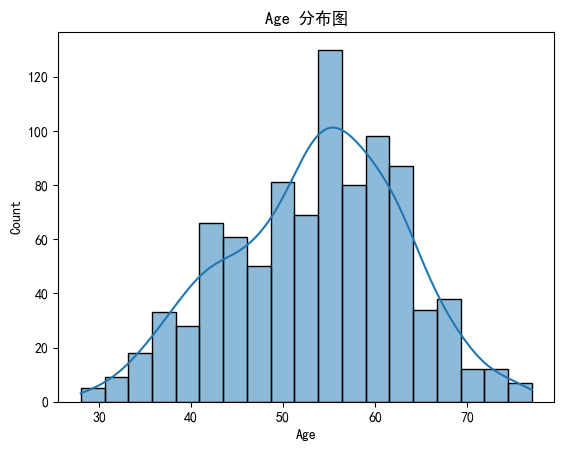

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64


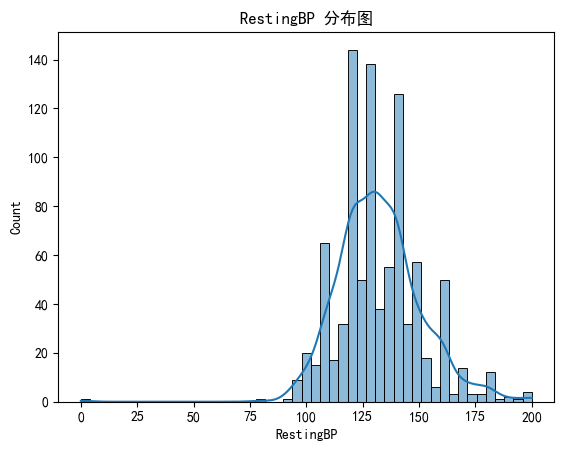

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


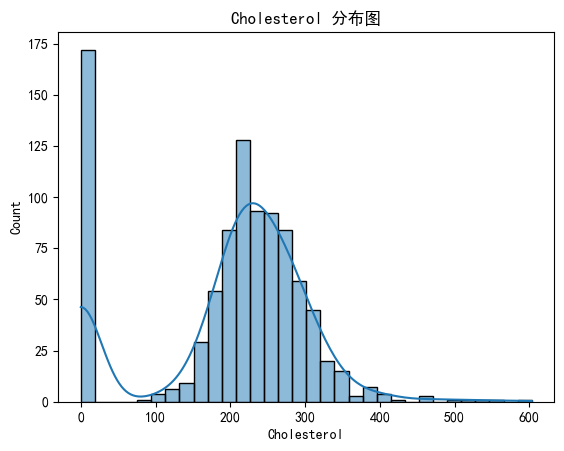

count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64


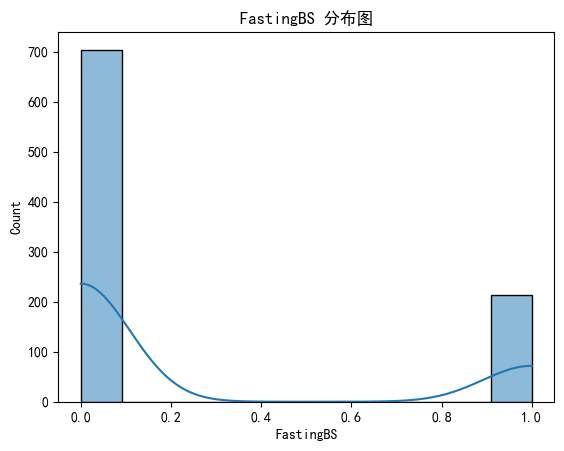

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64


count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64


count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64


In [9]:
def summary_numeric(col):
    print(df[col].describe())
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} ÂàÜÂ∏ÉÂõæ")
    plt.show()

for col in num_cols:
    summary_numeric(col)

##### ÁÆ±Á∫øÂõæ

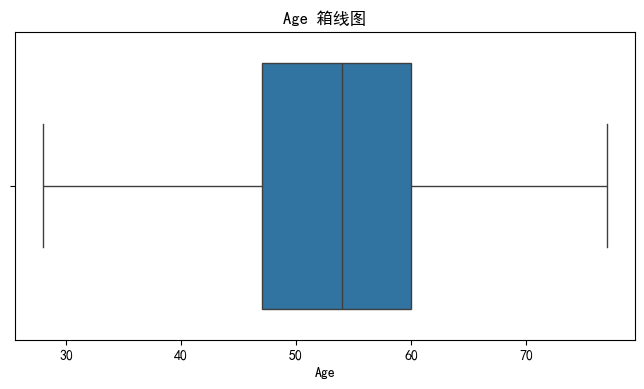

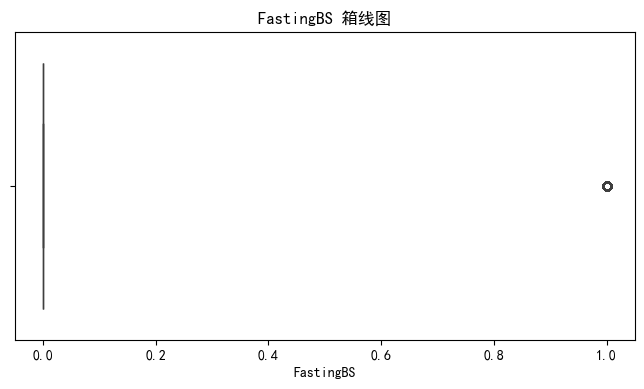

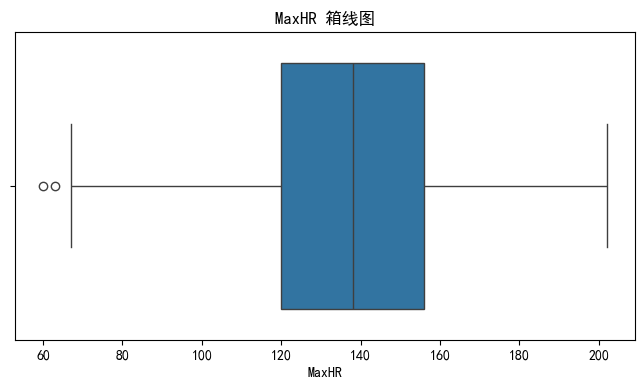

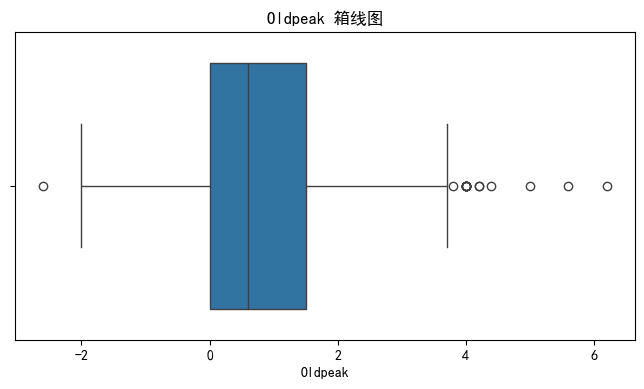

In [10]:
def boxplot_numeric(col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} ÁÆ±Á∫øÂõæ")
    plt.show()

for col in num_cols:
    boxplot_numeric(col)


##### Âà†Èô§‰ΩéÊñπÂ∑ÆÂàó

In [11]:
# ËÆæÂÆöÊñπÂ∑ÆÈòàÂÄº
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.1)
var_thresh.fit(df[num_cols])
# ÈÄâÊã©È´òÊñπÂ∑ÆÁâπÂæÅ
high_var_features = df[num_cols].columns[var_thresh.get_support()]
print('Âà†Èô§‰ΩéÊñπÂ∑ÆÂàó‰πãÂâçÁöÑÂàóÊï∞',len(num_cols))
print('Âà†Èô§‰ΩéÊñπÂ∑ÆÂàó‰πãÂêéÁöÑÂàóÊï∞',len(high_var_features))

Âà†Èô§‰ΩéÊñπÂ∑ÆÂàó‰πãÂâçÁöÑÂàóÊï∞ 7
Âà†Èô§‰ΩéÊñπÂ∑ÆÂàó‰πãÂêéÁöÑÂàóÊï∞ 7


In [12]:
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [13]:
high_var_features

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

##### Â§ÑÁêÜÁ¶ªÁæ§ÂÄº

In [14]:
def outlier_thresholds(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def check_outliers(data, col):
    lower, upper = outlier_thresholds(data, col)
    return data[(data[col] < lower) | (data[col] > upper)]

for col in high_var_features:
    print(f"{col} ÂºÇÂ∏∏ÂÄºÊï∞Èáè:", len(check_outliers(df, col)))

Age ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 0
RestingBP ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 28
Cholesterol ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 183
FastingBS ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 214
MaxHR ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 2
Oldpeak ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 16
HeartDisease ÂºÇÂ∏∏ÂÄºÊï∞Èáè: 0


In [15]:
def replace_outliers_with_median(data, col):
    lower, upper = outlier_thresholds(data, col)
    median = data[col].median()
    data[col] = np.where((data[col] < lower) | (data[col] > upper), median, data[col])

for col in high_var_features:
    replace_outliers_with_median(df, col)

##### Â°´Ë°•Á©∫ÂÄº

In [16]:
from sklearn.impute import KNNImputer

# ÂÅáËÆæ high_var_features ÊòØ‰Ω†Ë¶ÅÂ°´ÂÖÖÁöÑÁâπÂæÅÂàó
imputer = KNNImputer(n_neighbors=5)  # ËÆæÁΩÆ KNN ÁöÑÈÇªÂ±ÖÊï∞Èáè

# ‰ΩøÁî® KNN Â°´ÂÖÖÁº∫Â§±ÂÄº
df[high_var_features] = imputer.fit_transform(df[high_var_features])

# Ê£ÄÊü•Â°´ÂÖÖÂêéÁöÑÁº∫Â§±ÂÄºÊï∞Èáè
df[high_var_features].isnull().sum().sort_values(ascending=False).head(10)

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

In [17]:
df.isnull().sum().sort_values(ascending=False).head(10)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
dtype: int64

##### ÁªòÂà∂ÂàùÊ≠•Â§ÑÁêÜÂêéÁöÑÂàÜÂ∏ÉÂõæÂíåÁÆ±Á∫øÂõæ

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


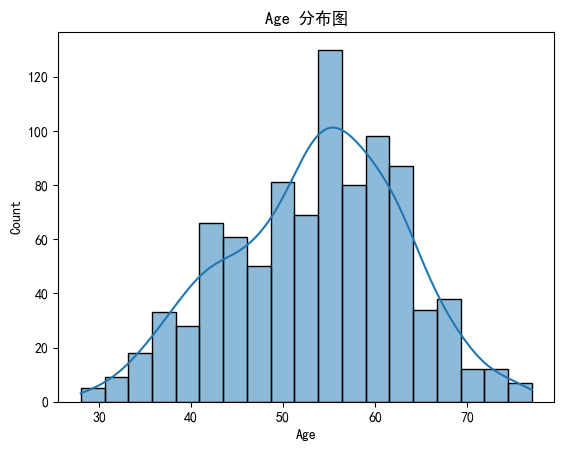

count    918.000000
mean     131.079521
std       15.597206
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: RestingBP, dtype: float64


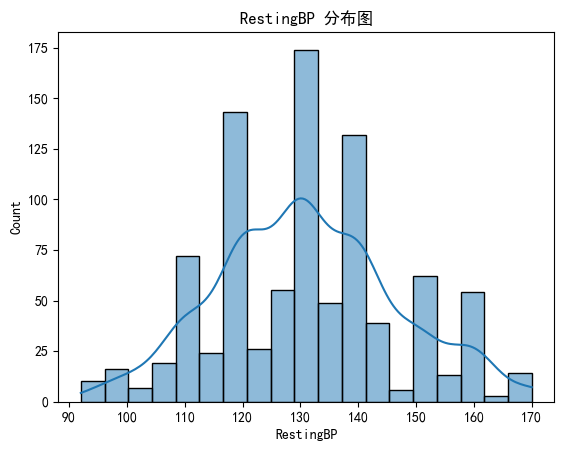

count    918.000000
mean     237.442266
std       46.339984
min       85.000000
25%      214.000000
50%      223.000000
75%      264.000000
max      407.000000
Name: Cholesterol, dtype: float64


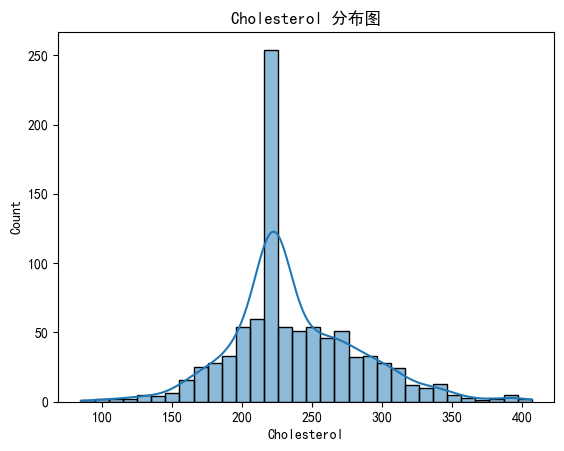

count    918.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: FastingBS, dtype: float64


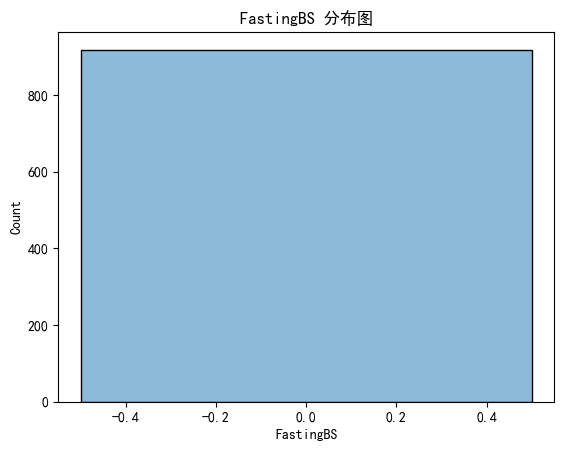

count    918.000000
mean     136.976035
std       25.215656
min       67.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64


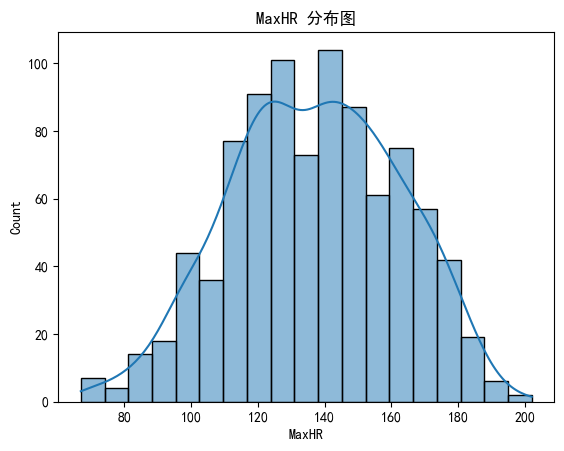

count    918.000000
mean       0.829412
std        0.958009
min       -2.000000
25%        0.000000
50%        0.600000
75%        1.500000
max        3.700000
Name: Oldpeak, dtype: float64


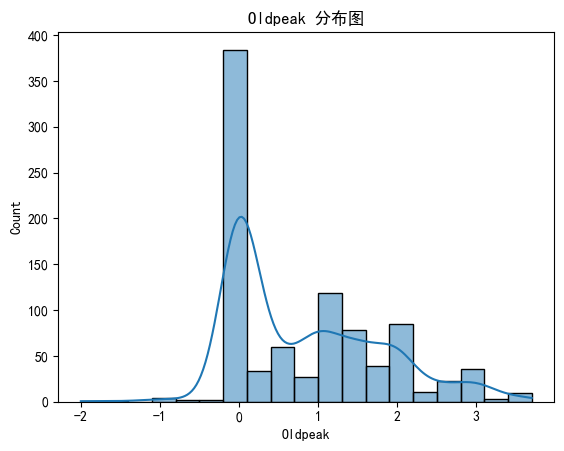

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64


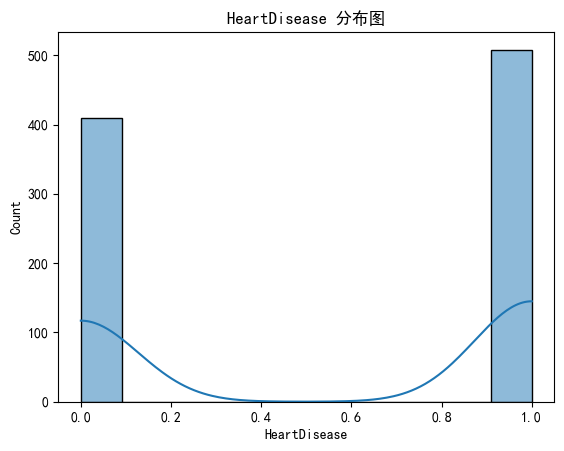

In [18]:
def summary_numeric(col):
    print(df[col].describe())
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} ÂàÜÂ∏ÉÂõæ")
    plt.show()

for col in high_var_features:
    summary_numeric(col)

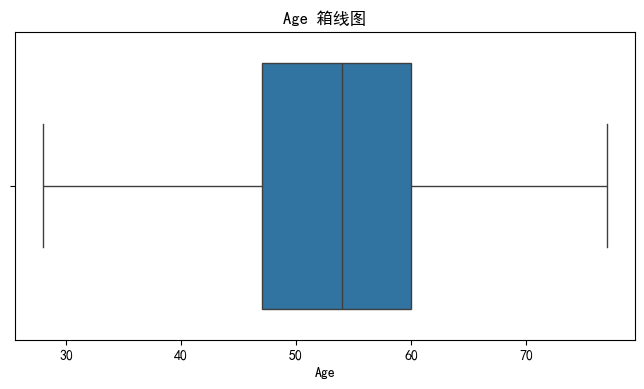

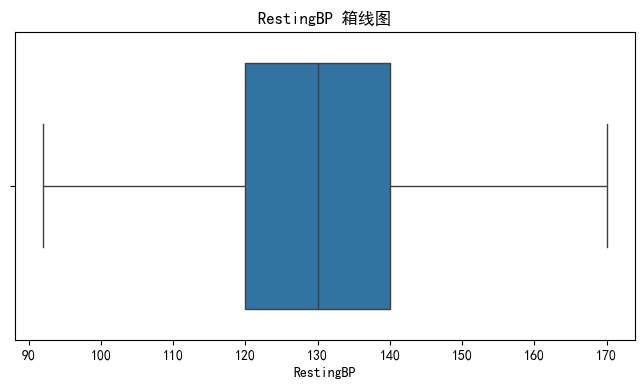

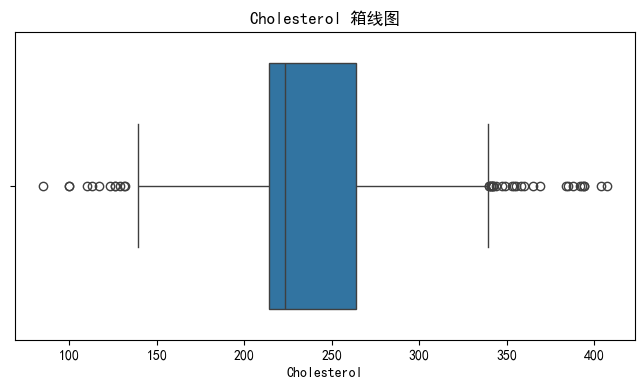

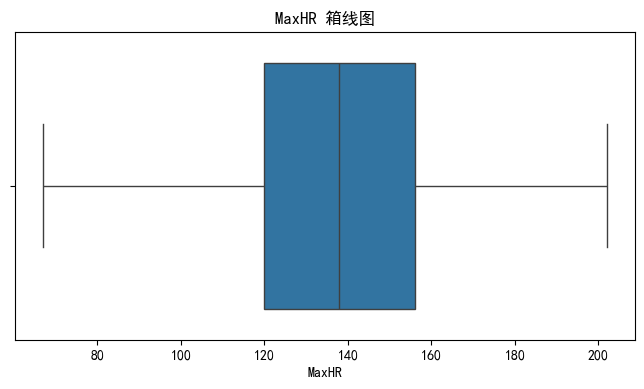

In [19]:
def boxplot_numeric(col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} ÁÆ±Á∫øÂõæ")
    plt.show()

for col in high_var_features:
    boxplot_numeric(col)

#### ÂàÜÊûêÂàÜÁ±ªÁâπÂæÅ

##### Êü•ÁúãÂîØ‰∏ÄÂÄº

In [20]:
df[cat_cols].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

##### ÁºñÁ†Å

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_columns(df):
    """
    ÂØπÂàÜÁ±ªÂàóËøõË°åÁºñÁ†ÅÂ§ÑÁêÜ
    - ‰∫åÂàÜÁ±ªÂèòÈáèÔºö‰ΩøÁî®Ê†áÁ≠æÁºñÁ†Å
    - Â§öÂàÜÁ±ªÂèòÈáèÔºö‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†ÅÂπ∂ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á±ªÂûã
    """

    label_encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object', 'category']).columns:
        unique_vals = df[col].nunique()

        if unique_vals == 2 or unique_vals == 1:
            # Ê†áÁ≠æÁºñÁ†Å
            df[col] = label_encoder.fit_transform(df[col])
        elif unique_vals > 2:
            # Áã¨ÁÉ≠ÁºñÁ†Å + ‰ªéÂ∏ÉÂ∞îÂÄºËΩ¨Êç¢‰∏∫Êï¥Êï∞
            dummies = pd.get_dummies(df[col], prefix=col).astype(int)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    return df

In [22]:
df = encode_categorical_columns(df)

In [23]:
df.isnull().sum().sort_values(ascending=False).head()

Age                  0
ChestPainType_ATA    0
ST_Slope_Flat        0
ST_Slope_Down        0
RestingECG_ST        0
dtype: int64

### È¢ÑÂ§ÑÁêÜÁªìÊûú

In [24]:
y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis=1)

###  Ê®°ÂûãËÆ≠ÁªÉ

#### ÂáÜÂ§áÂ§çÁî®ÂáΩÊï∞

In [25]:
# Ê∑∑Ê∑ÜÁü©ÈòµÂáΩÊï∞
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('È¢ÑÊµãÊ†áÁ≠æ')
    plt.ylabel('ÁúüÂÆûÊ†áÁ≠æ')
    plt.title('Ê∑∑Ê∑ÜÁü©Èòµ')
    plt.show()

In [26]:
# Âü∫Á°ÄËØÑÂàÜ
from sklearn.metrics import recall_score

def print_model_scores(pipe, X_test, y_test):
    print("Ê®°ÂûãÂæóÂàÜ:", pipe.score(X_test, y_test))
    print("Âè¨ÂõûÁéá:", recall_score(y_test, pipe.predict(X_test)))
    print("AUCËØÑÂàÜ:", roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))


In [27]:
# Â∏∏Áî®ÊåáÊ†áÂáΩÊï∞
def print_classification_report(y_true, y_pred):
    print("ÂàÜÁ±ªÊä•Âëä:\n", classification_report(y_true, y_pred))

In [28]:
# ÁªòÂà∂ROCÊõ≤Á∫øÂáΩÊï∞
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROCÊõ≤Á∫ø (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('ÂÅáÈò≥ÊÄßÁéá')
    plt.ylabel('ÁúüÈò≥ÊÄßÁéá')
    plt.title('ROCÊõ≤Á∫ø')
    plt.legend()
    plt.show()

In [29]:
# ÁªòÂà∂PRÊõ≤Á∫øÂáΩÊï∞
from sklearn.metrics import precision_recall_curve

def plot_pr_curve(y_true, y_pred_probs):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='PRÊõ≤Á∫ø (AUC = {:.2f})'.format(auc(recall, precision)))
    plt.xlabel('Âè¨ÂõûÁéá')
    plt.ylabel('Á≤æÁ°ÆÁéá')
    plt.title('PRÊõ≤Á∫ø')
    plt.legend()
    plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score


def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, cv=5):
    
    # Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f'\n{model_name} ÊµãËØïÈõÜËØÑ‰º∞ÁªìÊûú:')
    print(f'ÂáÜÁ°ÆÁéá: {accuracy:.4f}')
    print(f'Á≤æÁ°ÆÁéá: {precision:.4f}')
    print(f'Âè¨ÂõûÁéá: {recall:.4f}')
    
    # ‰∫§ÂèâÈ™åËØÅËØÑ‰º∞
    print(f'\n{model_name} ‰∫§ÂèâÈ™åËØÅÁªìÊûú (cv={cv}):')
    # ‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá: {cv_accuracy.mean():.4f} (¬±{cv_accuracy.std():.4f})')
    
    # ‰∫§ÂèâÈ™åËØÅÁ≤æÁ°ÆÁéá
    cv_precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    print(f'‰∫§ÂèâÈ™åËØÅÁ≤æÁ°ÆÁéá: {cv_precision.mean():.4f} (¬±{cv_precision.std():.4f})')
    
    # ‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá
    cv_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    print(f'‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {cv_recall.mean():.4f} (¬±{cv_recall.std():.4f})')
    
    # ËøîÂõûÊâÄÊúâËØÑ‰º∞ÊåáÊ†á
    return {
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'cv_accuracy': (cv_accuracy.mean(), cv_accuracy.std()),
        'cv_precision': (cv_precision.mean(), cv_precision.std()),
        'cv_recall': (cv_recall.mean(), cv_recall.std())
    }

#### ÂàáÂâ≤Êï∞ÊçÆÈõÜ

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### XGBoostÊ®°Âûã

ÂºÄÂßãÁΩëÊ†ºÊêúÁ¥¢...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

ÁΩëÊ†ºÊêúÁ¥¢ÂÆåÊàê!
ÊúÄ‰Ω≥ÂèÇÊï∞: {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: 0.9198

ÊúÄ‰Ω≥Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞:
Ê®°ÂûãÂæóÂàÜ: 0.8478260869565217
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9242424242424243

ÁΩëÊ†ºÊêúÁ¥¢ÂÆåÊàê!
ÊúÄ‰Ω≥ÂèÇÊï∞: {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: 0.9198

ÊúÄ‰Ω≥Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞:
Ê®°ÂûãÂæóÂàÜ: 0.8478260869565217
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9242424242424243


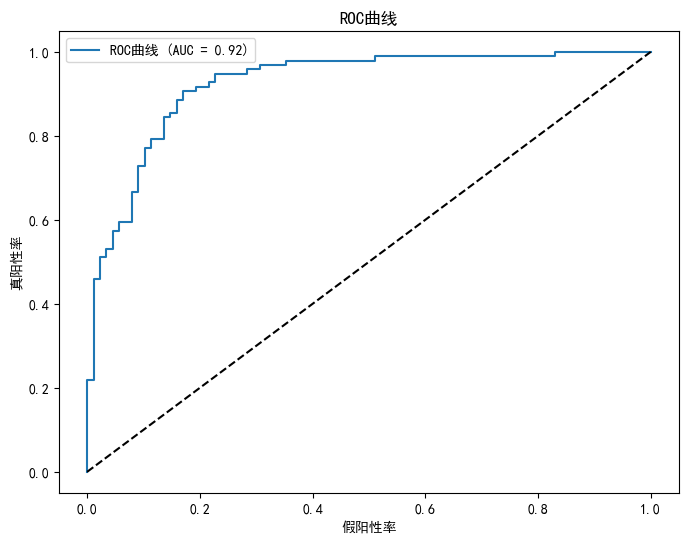

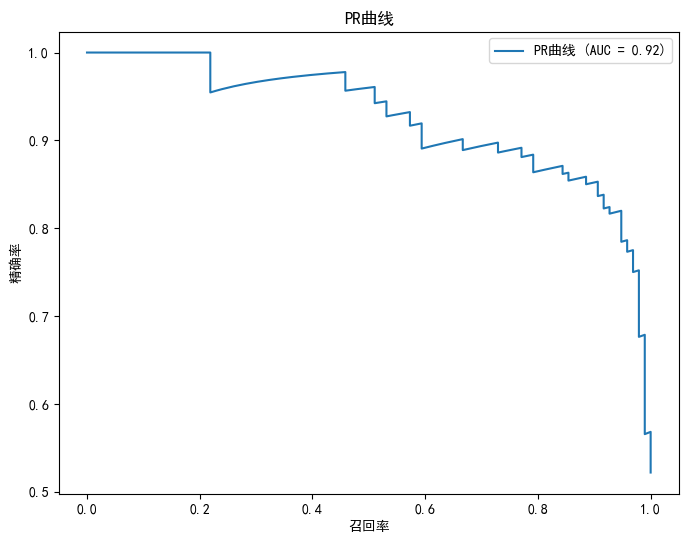


=== ÁΩëÊ†ºÊêúÁ¥¢ÂàÜÊûê ===
ÊÄªÂÖ±Â∞ùËØï‰∫Ü 243 ÁßçÂèÇÊï∞ÁªÑÂêà

Ë°®Áé∞ÊúÄÂ•ΩÁöÑ5ÁßçÂèÇÊï∞ÁªÑÂêà:
ÂàÜÊï∞: 0.9198 (¬±0.0267)
ÂèÇÊï∞: {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}
---
ÂàÜÊï∞: 0.9192 (¬±0.0272)
ÂèÇÊï∞: {'XGB__colsample_bytree': 0.9, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}
---
ÂàÜÊï∞: 0.9190 (¬±0.0280)
ÂèÇÊï∞: {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.9}
---
ÂàÜÊï∞: 0.9188 (¬±0.0291)
ÂèÇÊï∞: {'XGB__colsample_bytree': 0.8, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 200, 'XGB__subsample': 0.8}
---
ÂàÜÊï∞: 0.9186 (¬±0.0274)
ÂèÇÊï∞: {'XGB__colsample_bytree': 1.0, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}
---

ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (Ââç10):
1. ST_Slope_Up: 0.3360
2. ST_Slope_

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

# ÂàõÂª∫Âü∫Á°ÄÁÆ°ÈÅì
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
pipe_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("XGB", xgb_model)
])

# ËÆæÁΩÆÁΩëÊ†ºÊêúÁ¥¢ÂèÇÊï∞
param_grid = {
    'XGB__n_estimators': [100, 200, 300],           # Ê†ëÁöÑÊï∞Èáè
    'XGB__max_depth': [3, 5, 7],                    # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
    'XGB__learning_rate': [0.01, 0.1, 0.2],         # Â≠¶‰π†Áéá
    'XGB__subsample': [0.8, 0.9, 1.0],              # Ê†∑Êú¨ÈááÊ†∑ÊØî‰æã
    'XGB__colsample_bytree': [0.8, 0.9, 1.0]        # ÁâπÂæÅÈááÊ†∑ÊØî‰æã
}

# ËÆæÁΩÆ‰∫§ÂèâÈ™åËØÅÁ≠ñÁï•
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ÂàõÂª∫ÁΩëÊ†ºÊêúÁ¥¢ÂØπË±°
grid_search = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',          # ‰ΩøÁî®AUC‰Ωú‰∏∫ËØÑ‰º∞ÊåáÊ†á
    n_jobs=-1,                  # ‰ΩøÁî®ÊâÄÊúâCPUÊ†∏ÂøÉ
    verbose=1,                  # ÊòæÁ§∫ËøõÂ∫¶
    return_train_score=True     # ËøîÂõûËÆ≠ÁªÉÂàÜÊï∞
)

# ÊâßË°åÁΩëÊ†ºÊêúÁ¥¢
print("ÂºÄÂßãÁΩëÊ†ºÊêúÁ¥¢...")
grid_search.fit(X_train, y_train)

print("\nÁΩëÊ†ºÊêúÁ¥¢ÂÆåÊàê!")
print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {grid_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: {grid_search.best_score_:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°ÂûãËøõË°åÈ¢ÑÊµã
best_pipe = grid_search.best_estimator_

# ËØÑ‰º∞ÊúÄ‰Ω≥Ê®°Âûã
print("\nÊúÄ‰Ω≥Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞:")
print_model_scores(best_pipe, X_test, y_test)

# ÁªòÂà∂Êõ≤Á∫ø
plot_roc_curve(y_test, best_pipe.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_pipe.predict_proba(X_test)[:, 1])

# È¢ùÂ§ñÁöÑÂàÜÊûê‰ø°ÊÅØ
print("\n=== ÁΩëÊ†ºÊêúÁ¥¢ÂàÜÊûê ===")

# Êü•ÁúãÊâÄÊúâÂèÇÊï∞ÁªÑÂêàÁöÑÁªìÊûú
results_df = pd.DataFrame(grid_search.cv_results_)
print(f"ÊÄªÂÖ±Â∞ùËØï‰∫Ü {len(results_df)} ÁßçÂèÇÊï∞ÁªÑÂêà")

# Êü•ÁúãÂâçÂá†ÂêçÂèÇÊï∞ÁªÑÂêà
top_results = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]
print("\nË°®Áé∞ÊúÄÂ•ΩÁöÑ5ÁßçÂèÇÊï∞ÁªÑÂêà:")
for i, row in top_results.iterrows():
    print(f"ÂàÜÊï∞: {row['mean_test_score']:.4f} (¬±{row['std_test_score']:.4f})")
    print(f"ÂèÇÊï∞: {row['params']}")
    print("---")

# ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàÂ¶ÇÊûúÂèØÁî®Ôºâ
if hasattr(best_pipe.named_steps['XGB'], 'feature_importances_'):
    importances = best_pipe.named_steps['XGB'].feature_importances_
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
    
    # ÊåâÈáçË¶ÅÊÄßÊéíÂ∫è
    indices = np.argsort(importances)[::-1]
    print("\nÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (Ââç10):")
    for i in range(min(10, len(importances))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

#### LightGBMÊ®°Âûã

[I 2025-09-04 19:12:15,264] A new study created in memory with name: no-name-04817643-a428-4c03-8b05-6a905278cf09


ÂºÄÂßã‰ΩøÁî® Optuna ‰ºòÂåñ LightGBMÔºàÁõÆÊ†áÔºöÂè¨ÂõûÁéáÔºâ...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-09-04 19:12:17,009] Trial 0 finished with value: 0.8980570541979619 and parameters: {'n_estimators': 200, 'learning_rate': 0.1540359659501924, 'num_leaves': 97, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.8832290311184181, 'colsample_bytree': 0.608233797718321, 'reg_alpha': 5.360294728728285, 'reg_lambda': 0.31044435499483225}. Best is trial 0 with value: 0.8980570541979619.
[I 2025-09-04 19:12:19,292] Trial 1 finished with value: 0.9175394054797419 and parameters: {'n_estimators': 200, 'learning_rate': 0.002620503255096255, 'num_leaves': 35, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.7168578594140873, 'colsample_bytree': 0.7465447373174767, 'reg_alpha': 0.00012724181576752517, 'reg_lambda': 0.1165691561324743}. Best is trial 1 with value: 0.9175394054797419.
[I 2025-09-04 19:12:19,292] Trial 1 finished with value: 0.9175394054797419 and parameters: {'n_estimators': 200, 'learning_rate': 0.002620503255096255, 'num_leaves': 35, 'max_depth': 10, 'min_ch

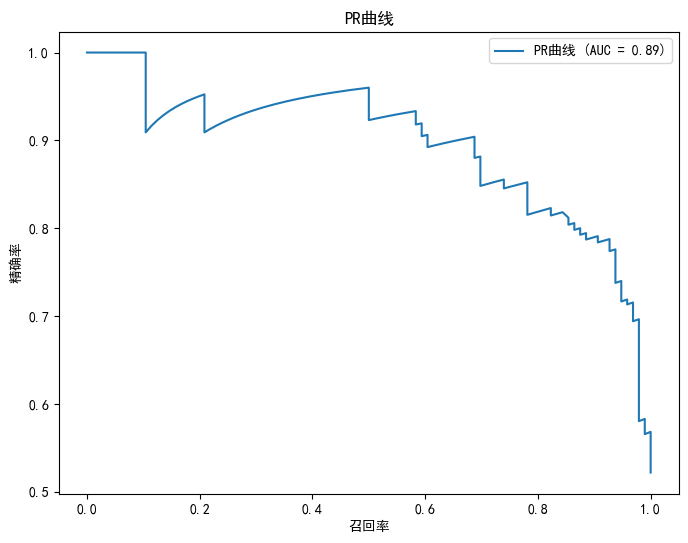


ÂèÇÊï∞ÈáçË¶ÅÊÄß:
min_child_samples: 0.2754
colsample_bytree: 0.2516
learning_rate: 0.1973
max_depth: 0.0742
num_leaves: 0.0638
subsample: 0.0531
n_estimators: 0.0498
reg_lambda: 0.0299
reg_alpha: 0.0050


In [33]:
from sklearn.metrics import recall_score, make_scorer, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
warnings.filterwarnings("ignore")

# === ËøêË°åÂÅ•Â£ÆÊÄßÂ¢ûÂº∫ÔºöÊï∞ÊçÆ‰∏éÂèòÈáèÂÖúÂ∫ï ===
# Ëã•Áº∫Â∞ë X,yÔºåÂ∞ùËØï‰ªé df ÊàñÁ£ÅÁõòÊûÑÂª∫
if 'X' not in globals() or 'y' not in globals():
    if 'df' not in globals():
        default_path = os.path.join('data_set', 'heart.csv')
        if os.path.exists(default_path):
            df = pd.read_csv(default_path)
            print(f"üìÑ Â∑≤‰ªé {default_path} ËØªÂèñÊï∞ÊçÆÈõÜ")
        else:
            raise RuntimeError("Áº∫Â∞ë X,y/dfÔºå‰∏îÈªòËÆ§Êï∞ÊçÆÈõÜ data_set/heart.csv ‰∏çÂ≠òÂú®ÔºåËØ∑ÂÖàËøêË°å‰∏äÊñπÊï∞ÊçÆÂáÜÂ§áÂçïÂÖÉ„ÄÇ")
    if 'HeartDisease' in df.columns:
        y = df['HeartDisease']
        X = df.drop(['HeartDisease'], axis=1)
        print("‚öôÔ∏è Â∑≤Ê†πÊçÆ df ÁîüÊàê X,yÔºàÁõÆÊ†áÂàó: HeartDiseaseÔºâ")
    else:
        raise RuntimeError("df ‰∏≠‰∏çÂ≠òÂú®Âàó 'HeartDisease'ÔºåËØ∑Ê£ÄÊü•Êï∞ÊçÆÂáÜÂ§áÊµÅÁ®ã„ÄÇ")

# Ëã•Êú™ÊãÜÂàÜÊï∞ÊçÆÔºåÂàôÂü∫‰∫é X,y Ëá™Âä®ÊãÜÂàÜ
if 'X_train' not in globals() or 'y_train' not in globals():
    try:
        stratify = y if hasattr(y, 'values') else y
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=stratify, random_state=42)
        print("‚öôÔ∏è Â∑≤Ëá™Âä®Âü∫‰∫é X,y ËøõË°å train_test_split (test_size=0.2, stratify=y)")
    except Exception:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("‚öôÔ∏è Â∑≤Ëá™Âä®ËøõË°å train_test_split (Êú™ÂàÜÂ±Ç)")

# ËØÜÂà´Êï∞ÂÄº/Á±ªÂà´ÂàóÔºåÂπ∂ÊûÑÂª∫Áªü‰∏ÄÈ¢ÑÂ§ÑÁêÜÂô®
num_cols = X_train.select_dtypes(include=['number', 'bool']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
def make_preprocessor():
    transformers = []
    if len(num_cols) > 0:
        transformers.append(('num', StandardScaler(with_mean=False), num_cols))
    if len(cat_cols) > 0:
        transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols))
    return ColumnTransformer(transformers=transformers)

# Ëã•Áº∫Â∞ëËØÑ‰º∞‰∏éÂèØËßÜÂåñÂáΩÊï∞ÔºåÊèê‰æõÁÆÄÂåñÂÖúÂ∫ïÂÆûÁé∞
if 'print_model_scores' not in globals():
    def print_model_scores(model, X_te, y_te):
        proba = model.predict_proba(X_te)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_te)
        pred = (proba >= 0.5).astype(int) if np.ndim(proba) == 1 else model.predict(X_te)
        acc = accuracy_score(y_te, pred)
        rec = recall_score(y_te, pred, pos_label=1)
        prec = precision_score(y_te, pred, zero_division=0)
        f1 = f1_score(y_te, pred)
        auc = roc_auc_score(y_te, proba) if np.ndim(proba) == 1 else np.nan
        print(f"Accuracy: {acc:.4f}  Recall: {rec:.4f}  Precision: {prec:.4f}  F1: {f1:.4f}  AUC: {auc:.4f}")

if 'plot_roc_curve' not in globals():
    def plot_roc_curve(y_true, y_score):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_val = roc_auc_score(y_true, y_score)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC AUC={auc_val:.3f}')
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

if 'plot_pr_curve' not in globals():
    def plot_pr_curve(y_true, y_score):
        prec, rec, _ = precision_recall_curve(y_true, y_score)
        ap = average_precision_score(y_true, y_score)
        plt.figure()
        plt.plot(rec, prec, label=f'AP={ap:.3f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.show()

# ‰ΩøÁî® Optuna ‰ºòÂåñ LightGBMÔºåÁõÆÊ†áÔºöÊúÄÂ§ßÂåñÂ∞ëÊï∞Á±ªÂè¨ÂõûÁéá
try:
    import optuna
    from optuna.samplers import TPESampler
    from optuna.pruners import MedianPruner
except ImportError:
    raise ImportError("Êú™ÂÆâË£Ö optunaÔºåËØ∑ÂÖàÂÆâË£ÖÔºöpip install optuna")

from lightgbm import LGBMClassifier

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®ÔºàÊ≠£Á±ª‰∏∫1Ôºâ
recall_scorer = make_scorer(recall_score, pos_label=1)

def objective(trial):
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 15, 127),
        "max_depth": trial.suggest_categorical("max_depth", [-1, 4, 6, 8, 10]),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 80),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "random_state": 42,
        "verbosity": -1,
        "force_col_wise": True,
    }

    lgbm_model = LGBMClassifier(**params)
    pre = make_preprocessor()
    pipe_lgbm = Pipeline([
        ("pre", pre),
        ("LGBM", lgbm_model)
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipe_lgbm, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)
    return float(scores.mean())

# Âª∫Á´ã Study Âπ∂‰ºòÂåñ
study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=5)
)

print("ÂºÄÂßã‰ΩøÁî® Optuna ‰ºòÂåñ LightGBMÔºàÁõÆÊ†áÔºöÂè¨ÂõûÁéáÔºâ...")
study.optimize(objective, n_trials=40, timeout=600, show_progress_bar=True)

print("\nOptuna ÂÆåÊàê!")
print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {study.best_params}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {study.best_value:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊúÄÁªàÊ®°ÂûãÂπ∂ËØÑ‰º∞
best_params = study.best_params.copy()
best_lgbm = LGBMClassifier(**{
    **best_params,
    "objective": "binary",
    "boosting_type": "gbdt",
    "random_state": 42,
    "verbosity": -1,
    "force_col_wise": True,
})
best_model = Pipeline([
    ("pre", make_preprocessor()),
    ("LGBM", best_lgbm)
])
best_model.fit(X_train, y_train)

print("\nÊúÄ‰Ω≥Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞:")
y_score = best_model.predict_proba(X_test)[:, 1]
print_model_scores(best_model, X_test, y_test)
plot_roc_curve(y_test, y_score)
plot_pr_curve(y_test, y_score)

# ÂèÇÊï∞ÈáçË¶ÅÊÄßÔºàÂèØÈÄâÔºâ
try:
    from optuna.importance import get_param_importances
    imps = get_param_importances(study)
    print("\nÂèÇÊï∞ÈáçË¶ÅÊÄß:")
    for k, v in imps.items():
        print(f"{k}: {v:.4f}")
except Exception:
    pass

#### KNN

ÂºÄÂßãKNNÈöèÊú∫ÊêúÁ¥¢...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

ÊúÄ‰Ω≥ÂèÇÊï∞: {'KNN__algorithm': 'brute', 'KNN__n_neighbors': 5, 'KNN__p': 1, 'KNN__weights': 'uniform'}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.8811

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.8478260869565217
Âè¨ÂõûÁéá: 0.8229166666666666

ÊúÄ‰Ω≥ÂèÇÊï∞: {'KNN__algorithm': 'brute', 'KNN__n_neighbors': 5, 'KNN__p': 1, 'KNN__weights': 'uniform'}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.8811

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.8478260869565217
Âè¨ÂõûÁéá: 0.8229166666666666
AUCËØÑÂàÜ: 0.8763020833333334
AUCËØÑÂàÜ: 0.8763020833333334


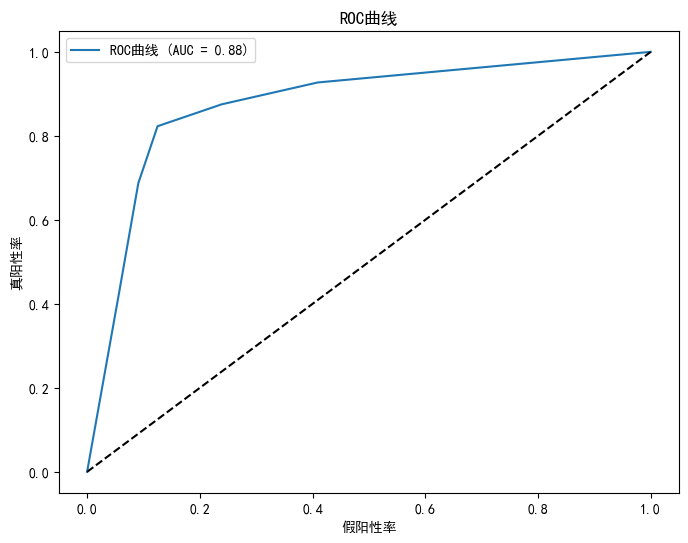

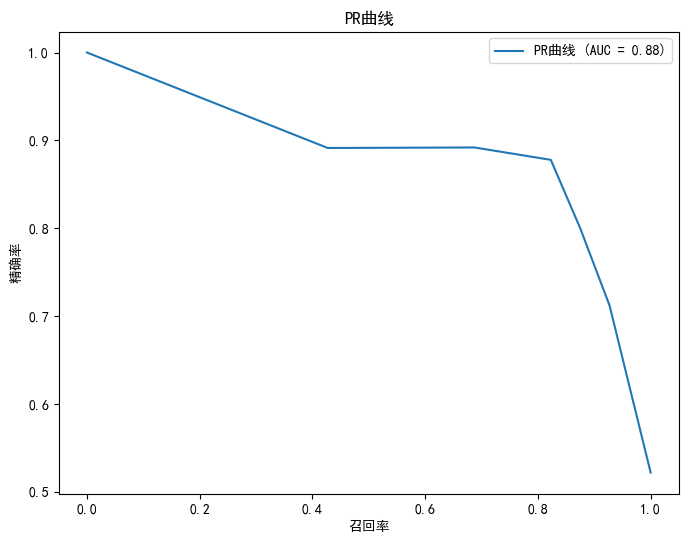

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import randint

# È¶ñÂÖàÂÆö‰πâKNNÁÆ°ÈÅì
knn_model = KNeighborsClassifier()
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN", knn_model)
])

# ÂÆö‰πâËá™ÂÆö‰πâËØÑ‰º∞ÊåáÊ†á - Âè¨ÂõûÁéá
recall_scorer = make_scorer(recall_score, pos_label=1)

# ÂÆö‰πâÂèÇÊï∞ÂàÜÂ∏É
param_dist = {
    'KNN__n_neighbors': randint(3, 20),          # 3Âà∞20‰πãÈó¥ÁöÑÈöèÊú∫Êï¥Êï∞
    'KNN__weights': ['uniform', 'distance'],
    'KNN__p': [1, 2],
    'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_knn,
    param_distributions=param_dist,
    n_iter=20,  # Ëø≠‰ª£Ê¨°Êï∞
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # ÂáèÂ∞ëÊäòÊï∞
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

# ÊâßË°åÈöèÊú∫ÊêúÁ¥¢
print("ÂºÄÂßãKNNÈöèÊú∫ÊêúÁ¥¢...")
random_search.fit(X_train, y_train)

# ËæìÂá∫ÁªìÊûú
print(f"\nÊúÄ‰Ω≥ÂèÇÊï∞: {random_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")

best_knn_model = random_search.best_estimator_
print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
print_model_scores(best_knn_model, X_test, y_test)
plot_roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])

#### SVM

ÂºÄÂßãSVMÈöèÊú∫ÊêúÁ¥¢...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

ÊúÄ‰Ω≥ÂèÇÊï∞: {'SVM__C': 3.8115440886530614, 'SVM__degree': 3, 'SVM__gamma': 0.000602521573620386, 'SVM__kernel': 'poly'}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 1.0000

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.5217391304347826
Âè¨ÂõûÁéá: 1.0
AUCËØÑÂàÜ: 0.903527462121212

ÊúÄ‰Ω≥ÂèÇÊï∞: {'SVM__C': 3.8115440886530614, 'SVM__degree': 3, 'SVM__gamma': 0.000602521573620386, 'SVM__kernel': 'poly'}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 1.0000

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.5217391304347826
Âè¨ÂõûÁéá: 1.0
AUCËØÑÂàÜ: 0.903527462121212


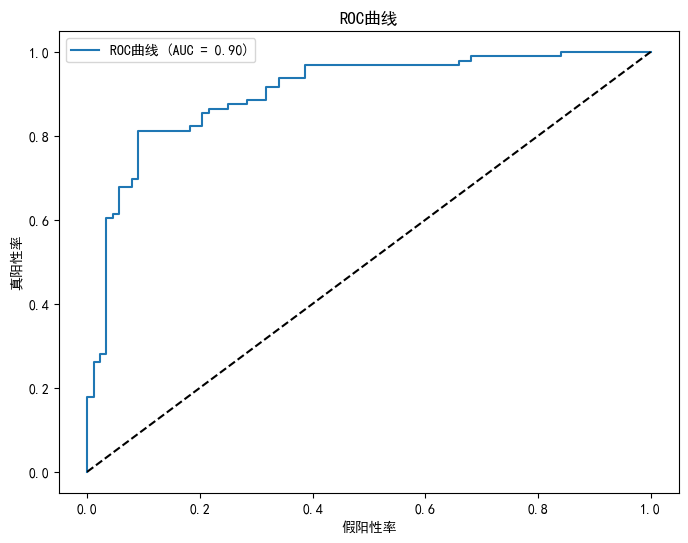

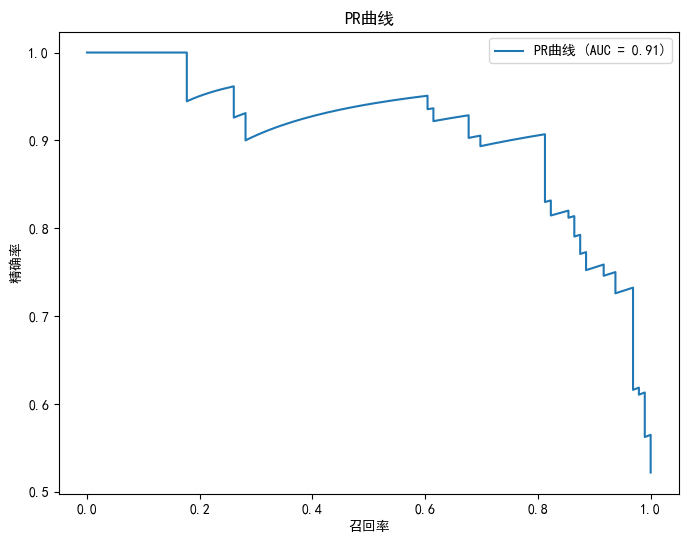

In [35]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, recall_score

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®
recall_scorer = make_scorer(recall_score)

# È¶ñÂÖàÂÆö‰πâSVMÁÆ°ÈÅì
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),  # SVMÈÄöÂ∏∏ÈúÄË¶ÅÁâπÂæÅÁº©Êîæ
    ("SVM", SVC(probability=True, random_state=42))  # Ê≥®ÊÑèËøôÈáåÁöÑÂêçÁß∞ÊòØ"SVM"ÔºåË¶Å‰∏éÂèÇÊï∞ÂàÜÂ∏É‰∏≠ÁöÑÂâçÁºÄ‰∏ÄËá¥
])

# ÂÆö‰πâÂèÇÊï∞ÂàÜÂ∏É
param_dist = {
    'SVM__C': loguniform(1e-3, 1e3),  # ÂØπÊï∞ÂùáÂåÄÂàÜÂ∏ÉÔºåË¶ÜÁõñÊõ¥Â§ßËåÉÂõ¥
    'SVM__kernel': ['linear', 'rbf', 'poly'],
    'SVM__gamma': loguniform(1e-4, 1e1),
    'SVM__degree': [2, 3, 4]
}

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_svm,  # Áé∞Âú®pipe_svmÂ∑≤ÁªèÂÆö‰πâ
    param_distributions=param_dist,
    n_iter=30,  # Ëø≠‰ª£Ê¨°Êï∞
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # ÂáèÂ∞ëÊäòÊï∞
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

# ÊâßË°åÈöèÊú∫ÊêúÁ¥¢
print("ÂºÄÂßãSVMÈöèÊú∫ÊêúÁ¥¢...")
random_search.fit(X_train, y_train)

# ËæìÂá∫ÁªìÊûú
print(f"\nÊúÄ‰Ω≥ÂèÇÊï∞: {random_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")

best_svm_model = random_search.best_estimator_
print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
print_model_scores(best_svm_model, X_test, y_test)
plot_roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])

#### ÈöèÊú∫Ê£ÆÊûó

ÂºÄÂßãÈöèÊú∫Ê£ÆÊûóÈöèÊú∫ÊêúÁ¥¢...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

ÊúÄ‰Ω≥ÂèÇÊï∞: {'RF__bootstrap': True, 'RF__class_weight': None, 'RF__max_depth': 31, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 9, 'RF__min_samples_split': 14, 'RF__n_estimators': 332}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.8956

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.8532608695652174
Âè¨ÂõûÁéá: 0.8645833333333334
AUCËØÑÂàÜ: 0.9209280303030304

ÊúÄ‰Ω≥ÂèÇÊï∞: {'RF__bootstrap': True, 'RF__class_weight': None, 'RF__max_depth': 31, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 9, 'RF__min_samples_split': 14, 'RF__n_estimators': 332}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.8956

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.8532608695652174
Âè¨ÂõûÁéá: 0.8645833333333334
AUCËØÑÂàÜ: 0.9209280303030304


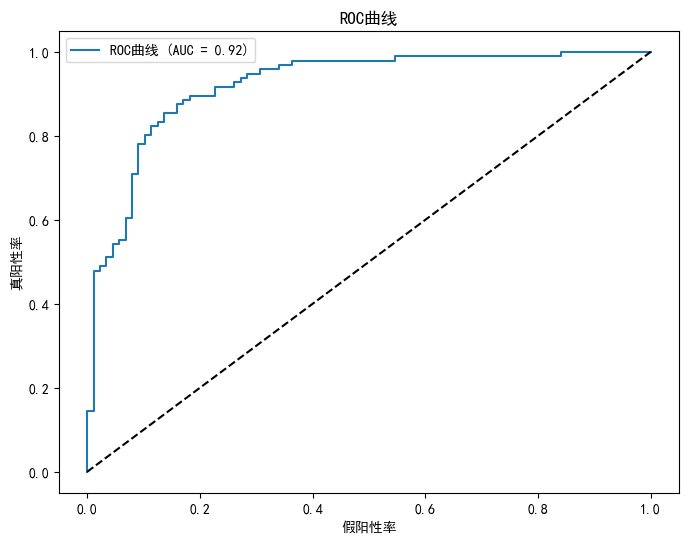

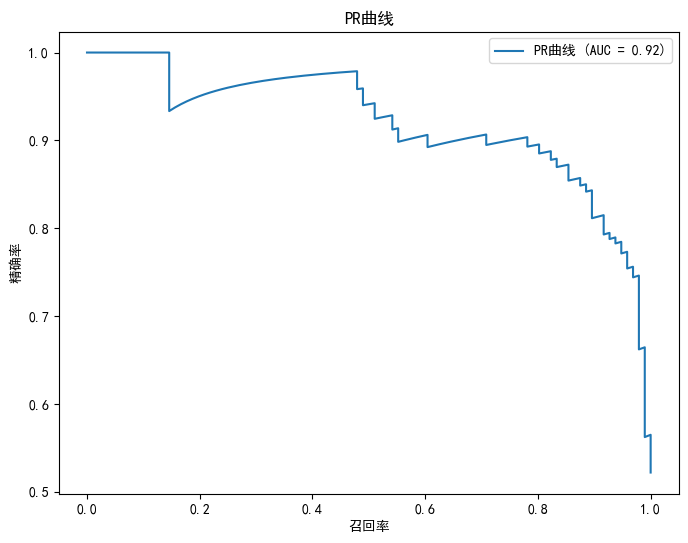

In [36]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # ÈöèÊú∫Ê£ÆÊûóÂØπÁâπÂæÅÁº©Êîæ‰∏çÊïèÊÑüÔºåÂèØÊ†πÊçÆÈúÄË¶ÅÈÄâÊã©
from sklearn.metrics import make_scorer, recall_score

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®ÔºàÂ¶ÇÊûú‰πãÂâçÊ≤°ÂÆö‰πâÁöÑËØùÔºâ
recall_scorer = make_scorer(recall_score)

# ÂÆö‰πâÈöèÊú∫Ê£ÆÊûóÁÆ°ÈÅì
pipe_rf = Pipeline([
    # Ê≥®ÊÑèÔºöÈöèÊú∫Ê£ÆÊûóÈÄöÂ∏∏‰∏çÈúÄË¶ÅÁâπÂæÅÁº©ÊîæÔºåËøôÈáå‰øùÁïôÊòØ‰∏∫‰∫Ü‰øùÊåÅ‰∏éÂÖ∂‰ªñÊ®°ÂûãÁöÑ‰∏ÄËá¥ÊÄß
    # ÂÆûÈôÖÂ∫îÁî®‰∏≠ÂèØ‰ª•ÁßªÈô§StandardScaler
    ("scaler", StandardScaler()),  
    ("RF", RandomForestClassifier(random_state=42))  # ÂêçÁß∞"RF"ÈúÄ‰∏éÂèÇÊï∞ÂàÜÂ∏É‰∏≠ÁöÑÂâçÁºÄ‰∏ÄËá¥
])

# ÂÆö‰πâÂèÇÊï∞ÂàÜÂ∏É
param_dist = {
    'RF__n_estimators': randint(100, 500),           # 100-500‰πãÈó¥ÁöÑÊ†ë
    'RF__max_depth': randint(5, 50),                 # 5-50ÁöÑÊ∑±Â∫¶
    'RF__min_samples_split': randint(2, 20),         # 2-20ÁöÑÊúÄÂ∞èÂàÜÂâ≤Ê†∑Êú¨
    'RF__min_samples_leaf': randint(1, 10),          # 1-10ÁöÑÊúÄÂ∞èÂè∂Â≠êÊ†∑Êú¨
    'RF__max_features': ['sqrt', 'log2', None],      # ÁâπÂæÅÈÄâÊã©ÊñπÂºè
    'RF__bootstrap': [True, False],
    'RF__class_weight': [None, 'balanced', 'balanced_subsample']
}

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_rf,  # Áé∞Âú®pipe_rfÂ∑≤ÂÆö‰πâ
    param_distributions=param_dist,
    n_iter=50,  # Ëø≠‰ª£Ê¨°Êï∞
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

# ÊâßË°åÈöèÊú∫ÊêúÁ¥¢
print("ÂºÄÂßãÈöèÊú∫Ê£ÆÊûóÈöèÊú∫ÊêúÁ¥¢...")
random_search.fit(X_train, y_train)

# ËæìÂá∫ÁªìÊûú
print(f"\nÊúÄ‰Ω≥ÂèÇÊï∞: {random_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")

best_rf_model = random_search.best_estimator_
print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
print_model_scores(best_rf_model, X_test, y_test)
plot_roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])

#### ÈÄªËæëÂõûÂΩí

ÂºÄÂßãÈÄªËæëÂõûÂΩíÈöèÊú∫ÊêúÁ¥¢...
ËÆ≠ÁªÉÊï∞ÊçÆÂΩ¢Áä∂: (734, 18)
Ê≠£Ê†∑Êú¨ÊØî‰æã: 0.561
Fitting 5 folds for each of 50 candidates, totalling 250 fits

ÊêúÁ¥¢ÂÆåÊàê! ËÄóÊó∂: 1.29Áßí
ÊúÄ‰Ω≥ÂèÇÊï∞: {'LR__C': 0.00011025488264291667, 'LR__class_weight': None, 'LR__l1_ratio': 0.2912291401980419, 'LR__penalty': 'l2', 'LR__solver': 'sag'}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 1.0000

ÊúÄ‰Ω≥5‰∏™ÂèÇÊï∞ÁªÑÂêà:
1. Âè¨ÂõûÁéá: 1.0000, ÂèÇÊï∞: {'LR__C': 0.00011025488264291667, 'LR__class_weight': None, 'LR__l1_ratio': 0.2912291401980419, 'LR__penalty': 'l2', 'LR__solver': 'sag'}
2. Âè¨ÂõûÁéá: 1.0000, ÂèÇÊï∞: {'LR__C': 0.00010072151787441792, 'LR__class_weight': None, 'LR__l1_ratio': 0.8607305832563434, 'LR__penalty': 'l2', 'LR__solver': 'sag'}
3. Âè¨ÂõûÁéá: 0.9951, ÂèÇÊï∞: {'LR__C': 0.00028965395242758657, 'LR__class_weight': None, 'LR__l1_ratio': 0.6947849330397046, 'LR__penalty': 'l2', 'LR__solver': 'saga'}
4. Âè¨ÂõûÁéá: 0.9272, ÂèÇÊï∞: {'LR__C': 0.0012329623163659848, 'LR__class_weight': None, 'LR__l1_ratio

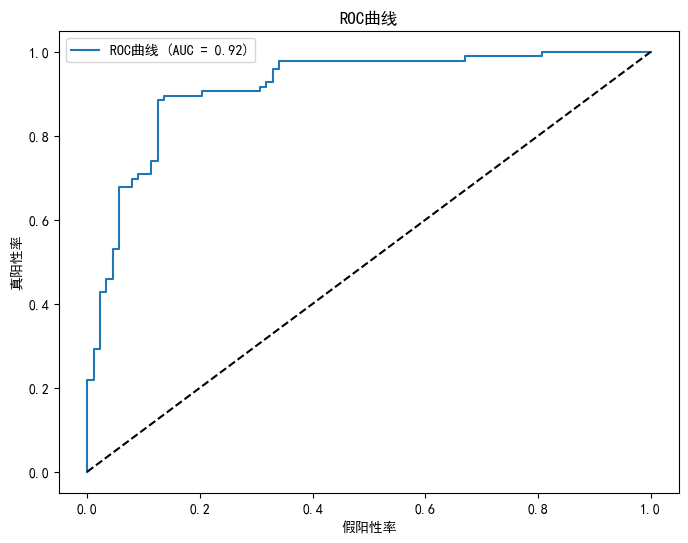

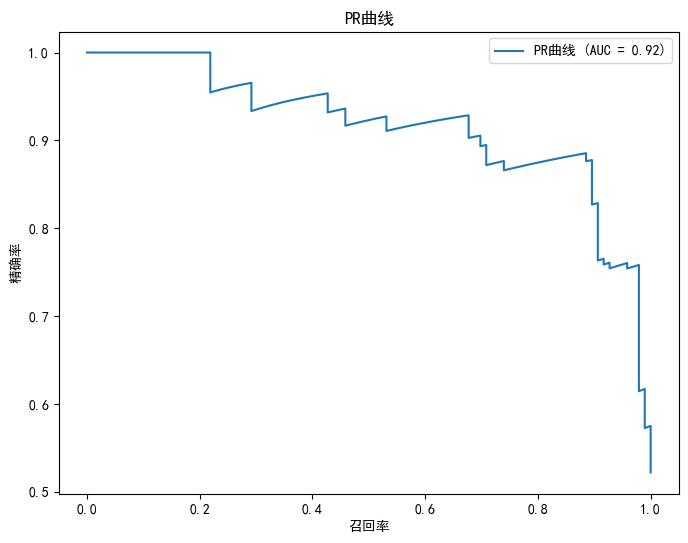


ÁâπÂæÅÈáçË¶ÅÊÄß (Ââç10‰∏™):
              feature  importance
17        ST_Slope_Up    0.023754
16      ST_Slope_Flat    0.021074
6      ExerciseAngina    0.018796
8   ChestPainType_ASY    0.018767
9   ChestPainType_ATA    0.015727
7             Oldpeak    0.015483
5               MaxHR    0.015277
1                 Sex    0.011639
0                 Age    0.010698
10  ChestPainType_NAP    0.006692


In [37]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, recall_score
import warnings
warnings.filterwarnings('ignore')

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®
recall_scorer = make_scorer(recall_score, average='binary', zero_division=0)

# ÂÆö‰πâÈÄªËæëÂõûÂΩíÁÆ°ÈÅì
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("LR", LogisticRegression(random_state=42, max_iter=2000, n_jobs=-1))
])

# ‰ºòÂåñÂèÇÊï∞ÂàÜÂ∏É - ËÄÉËôëÂèÇÊï∞ÂÖºÂÆπÊÄß
param_dist = [
    # ÂØπ‰∫éliblinearÂíåsaga solverÔºåÊîØÊåÅl1Âíål2ÊÉ©ÁΩö
    {
        'LR__solver': ['liblinear', 'saga'],
        'LR__penalty': ['l1', 'l2'],
        'LR__C': loguniform(1e-4, 1e2),
        'LR__class_weight': [None, 'balanced'],
        'LR__l1_ratio': uniform(0, 1)  # ‰ªÖÂØπelasticnetÊúâÊïàÔºå‰ΩÜËøôÈáå‰∏ç‰ºöÂÜ≤Á™Å
    },
    # ÂØπ‰∫élbfgs/newton-cg/sag solverÔºåÂè™ÊîØÊåÅl2ÊÉ©ÁΩö
    {
        'LR__solver': ['lbfgs', 'newton-cg', 'sag'],
        'LR__penalty': ['l2'],
        'LR__C': loguniform(1e-4, 1e2),
        'LR__class_weight': [None, 'balanced'],
        'LR__l1_ratio': uniform(0, 1)
    },
    # ÂØπ‰∫éelasticnetÊÉ©ÁΩöÔºåÂè™ÊîØÊåÅsaga solver
    {
        'LR__solver': ['saga'],
        'LR__penalty': ['elasticnet'],
        'LR__C': loguniform(1e-4, 1e2),
        'LR__class_weight': [None, 'balanced'],
        'LR__l1_ratio': uniform(0, 1)
    },
    # Êó†ÊÉ©ÁΩöÈ°πÁöÑÊÉÖÂÜµ
    {
        'LR__penalty': [None],
        'LR__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'LR__class_weight': [None, 'balanced'],
        'LR__C': [1.0],  # Êó†ÊÉ©ÁΩöÊó∂CÂèÇÊï∞Êó†ÊïàÔºåËÆæ‰∏∫Âõ∫ÂÆöÂÄº
        'LR__l1_ratio': [0.5]  # Êó†ÊïàÂèÇÊï∞ËÆæ‰∏∫Âõ∫ÂÆöÂÄº
    }
]

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_lr,
    param_distributions=param_dist,
    n_iter=50,  # Â¢ûÂä†Ëø≠‰ª£Ê¨°Êï∞‰ª•Ëé∑ÂæóÊõ¥Â•ΩÁöÑÁªìÊûú
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # Â¢ûÂä†‰∫§ÂèâÈ™åËØÅÊäòÊï∞
    n_jobs=-1,
    verbose=2,  # Êõ¥ËØ¶ÁªÜÁöÑËæìÂá∫
    random_state=42,
    refit=True,
    error_score='raise'  # ÈÅáÂà∞ÈîôËØØÊó∂ÊäõÂá∫ÂºÇÂ∏∏‰ª•‰æøË∞ÉËØï
)

print("ÂºÄÂßãÈÄªËæëÂõûÂΩíÈöèÊú∫ÊêúÁ¥¢...")
print(f"ËÆ≠ÁªÉÊï∞ÊçÆÂΩ¢Áä∂: {X_train.shape}")
print(f"Ê≠£Ê†∑Êú¨ÊØî‰æã: {y_train.mean():.3f}")

# Ê∑ªÂä†ËÆ°Êó∂ÂäüËÉΩ
import time
start_time = time.time()

try:
    random_search.fit(X_train, y_train)
    end_time = time.time()
    
    print(f"\nÊêúÁ¥¢ÂÆåÊàê! ËÄóÊó∂: {end_time - start_time:.2f}Áßí")
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {random_search.best_params_}")
    print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")
    
    # ÊòæÁ§∫ÊâÄÊúâÂ∞ùËØïÁöÑÁªìÊûú
    results_df = pd.DataFrame(random_search.cv_results_)
    print(f"\nÊúÄ‰Ω≥5‰∏™ÂèÇÊï∞ÁªÑÂêà:")
    top_5 = results_df.nlargest(5, 'mean_test_score')
    for i, (_, row) in enumerate(top_5.iterrows()):
        print(f"{i+1}. Âè¨ÂõûÁéá: {row['mean_test_score']:.4f}, ÂèÇÊï∞: {row['params']}")
    
    best_random_model = random_search.best_estimator_
    
    print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
    print_model_scores(best_random_model, X_test, y_test)
    
    # ÁªòÂà∂Êõ≤Á∫ø
    plot_roc_curve(y_test, best_random_model.predict_proba(X_test)[:, 1])
    plot_pr_curve(y_test, best_random_model.predict_proba(X_test)[:, 1])
    
    # ÁâπÂæÅÈáçË¶ÅÊÄßÔºàÂØπ‰∫éÁ∫øÊÄßÊ®°ÂûãÔºâ
    if hasattr(best_random_model.named_steps['LR'], 'coef_'):
        print("\nÁâπÂæÅÈáçË¶ÅÊÄß (Ââç10‰∏™):")
        coef = best_random_model.named_steps['LR'].coef_[0]
        feature_importance = pd.DataFrame({
            'feature': X_train.columns if hasattr(X_train, 'columns') else range(len(coef)),
            'importance': abs(coef)
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)
        print(feature_importance.head(10))
        
except Exception as e:
    print(f"ÊêúÁ¥¢ËøáÁ®ã‰∏≠Âá∫Áé∞ÈîôËØØ: {e}")
    print("Âª∫ËÆÆÊ£ÄÊü•ÂèÇÊï∞ÂÖºÂÆπÊÄßÊàñÂáèÂ∞ëÂèÇÊï∞ÊêúÁ¥¢Á©∫Èó¥")

#### GBDT

ÂºÄÂßãGBDTÈöèÊú∫ÊêúÁ¥¢...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {'GBDT__learning_rate': 0.14379765094284575, 'GBDT__max_depth': 7, 'GBDT__max_features': None, 'GBDT__min_samples_leaf': 9, 'GBDT__min_samples_split': 4, 'GBDT__n_estimators': 202, 'GBDT__subsample': 0.7015184751538656, 'GBDT__validation_fraction': 0.2}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.9029

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.842391304347826
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9083806818181818

ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {'GBDT__learning_rate': 0.14379765094284575, 'GBDT__max_depth': 7, 'GBDT__max_features': None, 'GBDT__min_samples_leaf': 9, 'GBDT__min_samples_split': 4, 'GBDT__n_estimators': 202, 'GBDT__subsample': 0.7015184751538656, 'GBDT__validation_fraction': 0.2}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.9029

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.842391304347826
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9083806818181818


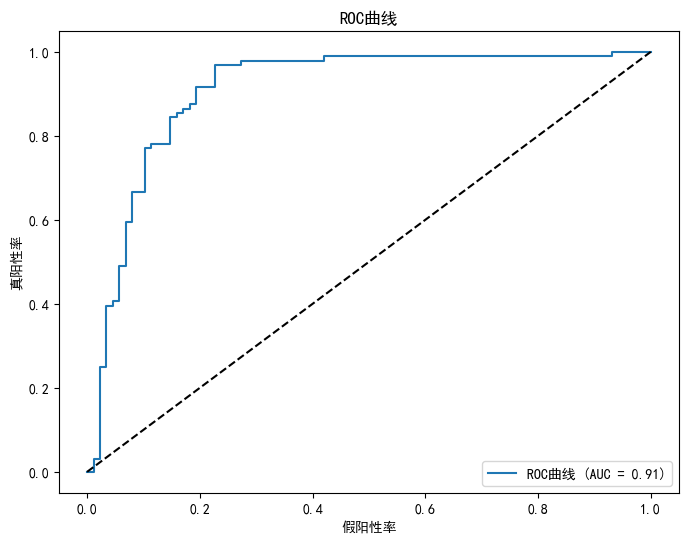

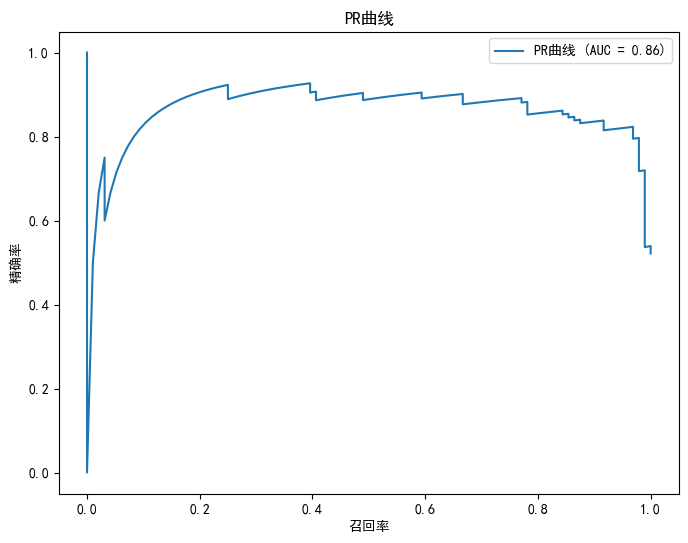

In [38]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, recall_score

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®
recall_scorer = make_scorer(
    recall_score,
    average='binary'
)

# ÂÆö‰πâGBDTÁöÑPipelineÁÆ°ÈÅìÔºå‰øÆÂ§çÂèÇÊï∞ÈîôËØØ
pipe_gbdt = Pipeline([
    ("scaler", StandardScaler()),
    ("GBDT", GradientBoostingClassifier(
        random_state=42,
        n_iter_no_change=10,  # Ê≠£Á°ÆÂèÇÊï∞ÔºöËøûÁª≠10ËΩÆÊó†ÊîπÂñÑÂàôÂÅúÊ≠¢
        validation_fraction=0.1  # Áî®‰∫éÊó©ÂÅúÁöÑÈ™åËØÅÈõÜÊØî‰æã
    ))
])

# ÂÆö‰πâÂèÇÊï∞ÂàÜÂ∏É
param_dist = {
    'GBDT__n_estimators': randint(50, 500),
    'GBDT__learning_rate': uniform(0.01, 0.2),
    'GBDT__max_depth': randint(2, 8),
    'GBDT__min_samples_split': randint(2, 20),
    'GBDT__min_samples_leaf': randint(1, 10),
    'GBDT__subsample': uniform(0.7, 0.3),
    'GBDT__max_features': ['sqrt', 'log2', None],
    'GBDT__validation_fraction': [0.1, 0.2]
}

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_gbdt,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

print("ÂºÄÂßãGBDTÈöèÊú∫ÊêúÁ¥¢...")
random_search.fit(X_train, y_train)

print(f"\nÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {random_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")

best_random_model = random_search.best_estimator_
print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
print_model_scores(best_random_model, X_test, y_test)
plot_roc_curve(y_test, best_random_model.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_random_model.predict_proba(X_test)[:, 1])

#### CatBoost

ÂºÄÂßãCatBoostÈöèÊú∫ÊêúÁ¥¢...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {'CatBoost__bagging_temperature': 0.12706051265188478, 'CatBoost__border_count': 39, 'CatBoost__depth': 8, 'CatBoost__iterations': 159, 'CatBoost__l2_leaf_reg': 3.1582102749684315, 'CatBoost__learning_rate': 0.19686714274570008, 'CatBoost__od_type': 'Iter', 'CatBoost__od_wait': 15, 'CatBoost__random_strength': 2.033634423372154}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.9054

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 0.8586956521739131
Âè¨ÂõûÁéá: 0.84375
AUCËØÑÂàÜ: 0.9300426136363636

ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {'CatBoost__bagging_temperature': 0.12706051265188478, 'CatBoost__border_count': 39, 'CatBoost__depth': 8, 'CatBoost__iterations': 159, 'CatBoost__l2_leaf_reg': 3.1582102749684315, 'CatBoost__learning_rate': 0.19686714274570008, 'CatBoost__od_type': 'Iter', 'CatBoost__od_wait': 15, 'CatBoost__random_strength': 2.033634423372154}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: 0.9054

ÊµãËØïÈõÜÊÄßËÉΩ:
Ê®°ÂûãÂæóÂàÜ: 

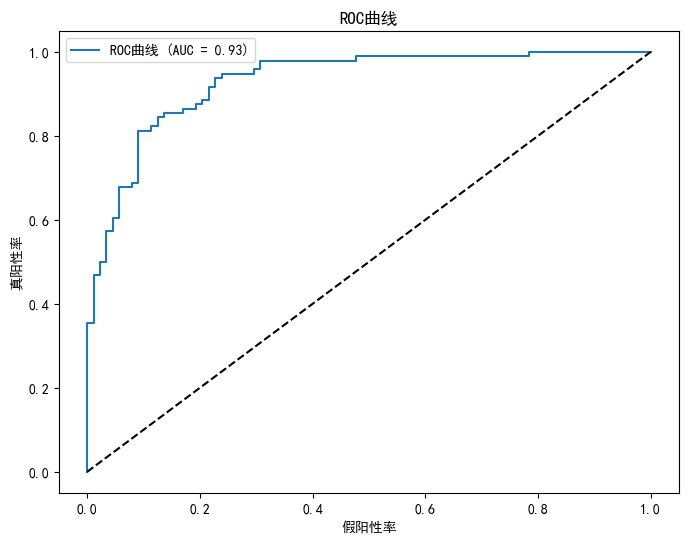

In [39]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, recall_score

# ÂÆö‰πâÂè¨ÂõûÁéáËØÑÂàÜÂô®
recall_scorer = make_scorer(
    recall_score,
    average='binary'
)

# ÂÆö‰πâCatBoostÁöÑPipelineÁÆ°ÈÅì
pipe_catboost = Pipeline([
    ("scaler", StandardScaler()),
    ("CatBoost", CatBoostClassifier(
        random_state=42,
        verbose=False,
        thread_count=-1  # ‰ΩøÁî®ÊâÄÊúâÂèØÁî®Á∫øÁ®ã
    ))
])

# ÂÆö‰πâÂèÇÊï∞ÂàÜÂ∏É
param_dist = {
    'CatBoost__iterations': randint(100, 500),
    'CatBoost__learning_rate': uniform(0.01, 0.3),
    'CatBoost__depth': randint(4, 10),
    'CatBoost__l2_leaf_reg': uniform(1, 10),
    'CatBoost__border_count': randint(32, 255),
    'CatBoost__bagging_temperature': uniform(0, 1),
    'CatBoost__random_strength': uniform(1, 20),
    'CatBoost__od_type': ['IncToDec', 'Iter'],
    'CatBoost__od_wait': randint(10, 50)
}

# ÂàõÂª∫ÈöèÊú∫ÊêúÁ¥¢ÂØπË±°
random_search = RandomizedSearchCV(
    estimator=pipe_catboost,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

print("ÂºÄÂßãCatBoostÈöèÊú∫ÊêúÁ¥¢...")
random_search.fit(X_train, y_train)

print(f"\nÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà: {random_search.best_params_}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂè¨ÂõûÁéá: {random_search.best_score_:.4f}")

best_catboost_model = random_search.best_estimator_
print("\nÊµãËØïÈõÜÊÄßËÉΩ:")
print_model_scores(best_catboost_model, X_test, y_test)
plot_roc_curve(y_test, best_catboost_model.predict_proba(X_test)[:, 1])
plot_pr_curve(y_test, best_catboost_model.predict_proba(X_test)[:, 1])

### Ê®°ÂûãÂØπÊØî

Ê®°Âûã GBDT ËØÑ‰º∞Â§±Ë¥•: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


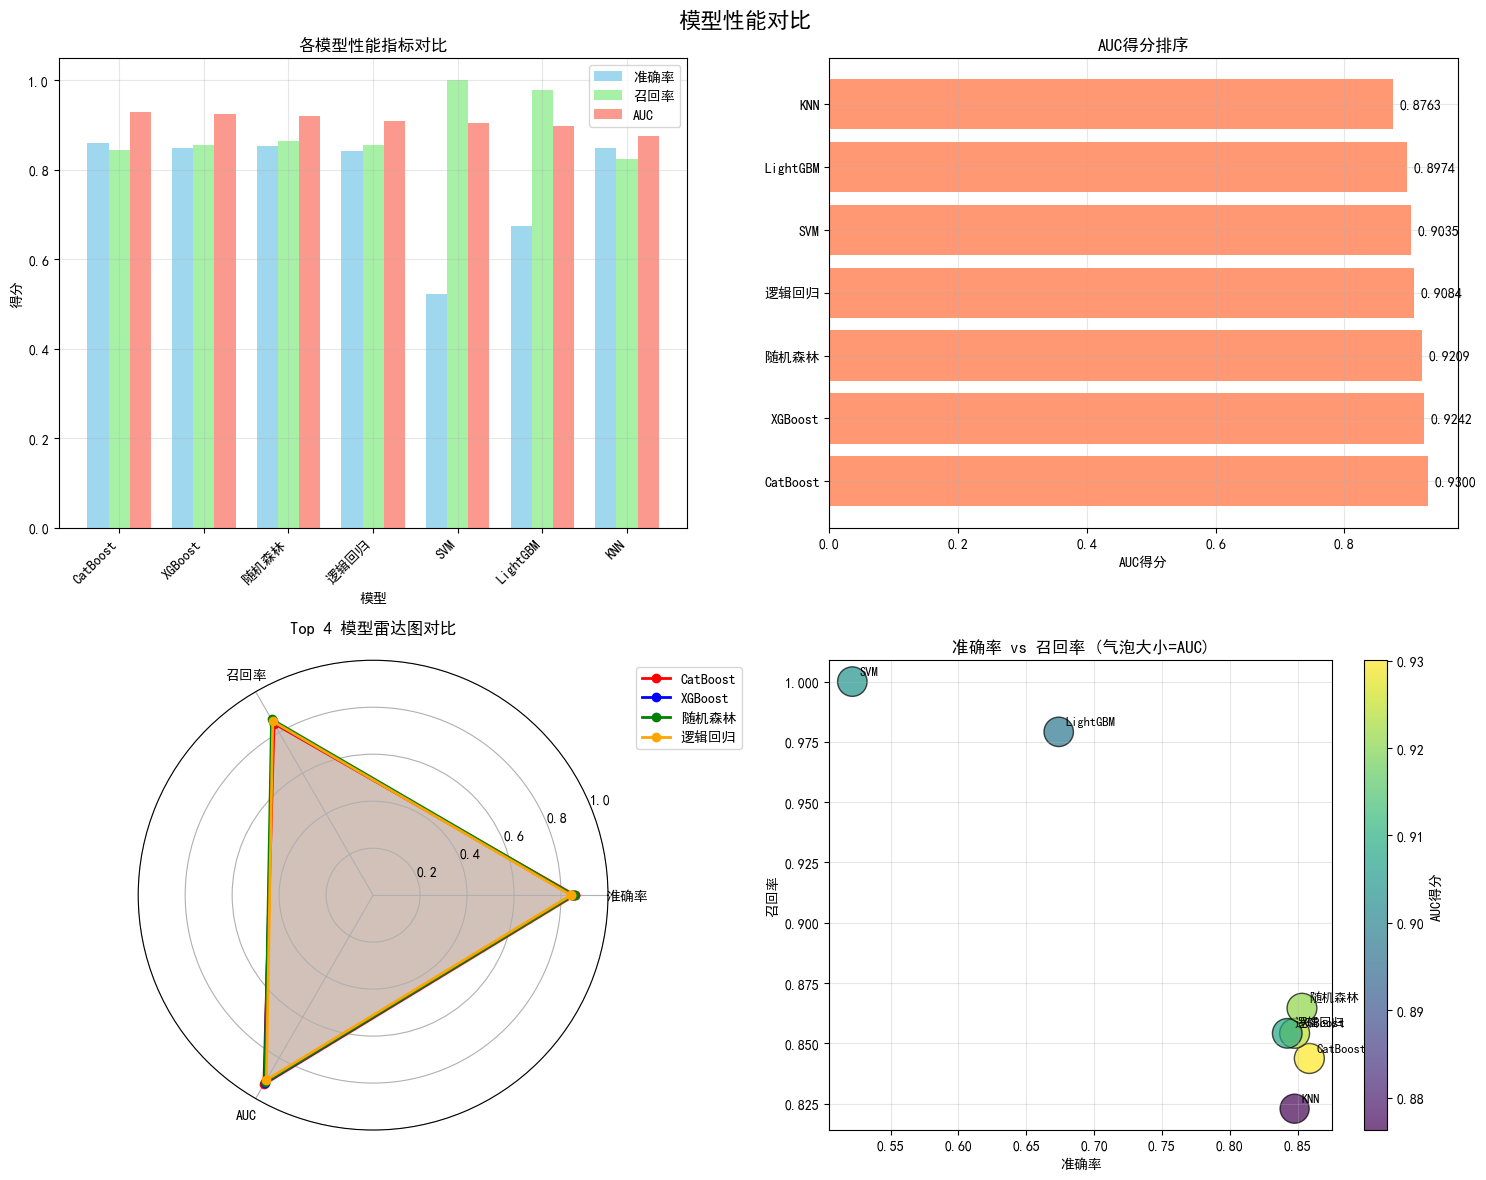

                    Ê®°ÂûãÊÄßËÉΩÊÄªÁªì
      Ê®°Âûã    ÂáÜÁ°ÆÁéá    Âè¨ÂõûÁéá    AUC
CatBoost 0.8587 0.8438 0.9300
 XGBoost 0.8478 0.8542 0.9242
    ÈöèÊú∫Ê£ÆÊûó 0.8533 0.8646 0.9209
    ÈÄªËæëÂõûÂΩí 0.8424 0.8542 0.9084
     SVM 0.5217 1.0000 0.9035
LightGBM 0.6739 0.9792 0.8974
     KNN 0.8478 0.8229 0.8763


In [42]:
def compare_all_models(X_test, y_test):
    """
    ÂØπÊØîÊâÄÊúâÊ®°ÂûãÁöÑÊÄßËÉΩ
    ‰ΩøÁî®ÂõæË°®Â±ïÁ§∫ÂØπÊØîÁªìÊûú
    """
    models = {
        'XGBoost': best_pipe,  # ‰ΩøÁî®ÁΩëÊ†ºÊêúÁ¥¢ÁöÑÊúÄ‰Ω≥XGBoostÊ®°Âûã
        'LightGBM': best_model,  # ‰ΩøÁî®Optuna‰ºòÂåñÁöÑLightGBMÊ®°Âûã
        'KNN': best_knn_model,
        'SVM': best_svm_model,
        'ÈöèÊú∫Ê£ÆÊûó': best_rf_model,
        'ÈÄªËæëÂõûÂΩí': best_random_model,  # ‰ΩøÁî®ÈöèÊú∫ÊêúÁ¥¢ÁöÑÊúÄ‰Ω≥ÈÄªËæëÂõûÂΩíÊ®°Âûã
        'GBDT': pipe_gbdt,  # ‰ΩøÁî®Âü∫Á°ÄÁöÑGBDTÁÆ°ÈÅì
        'CatBoost': best_catboost_model
    }
    
    results = []
    
    for name, model in models.items():
        try:
            # ËÆ°ÁÆóÂêÑÈ°πÊåáÊ†á
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            accuracy = model.score(X_test, y_test)
            recall = recall_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            results.append({
                'Ê®°Âûã': name,
                'ÂáÜÁ°ÆÁéá': accuracy,
                'Âè¨ÂõûÁéá': recall,
                'AUC': auc_score
            })
        except Exception as e:
            print(f"Ê®°Âûã {name} ËØÑ‰º∞Â§±Ë¥•: {e}")
            continue
    
    # ËΩ¨Êç¢‰∏∫DataFrameÂπ∂ÊåâAUCÊéíÂ∫è
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('AUC', ascending=False)
    
    # ÂàõÂª∫ÂõæË°®Â±ïÁ§∫
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Ê®°ÂûãÊÄßËÉΩÂØπÊØî', fontsize=16, fontweight='bold')
    
    # 1. Êü±Áä∂Âõæ - ÊâÄÊúâÊåáÊ†á
    ax1 = axes[0, 0]
    x = np.arange(len(results_df))
    width = 0.25
    
    ax1.bar(x - width, results_df['ÂáÜÁ°ÆÁéá'], width, label='ÂáÜÁ°ÆÁéá', alpha=0.8, color='skyblue')
    ax1.bar(x, results_df['Âè¨ÂõûÁéá'], width, label='Âè¨ÂõûÁéá', alpha=0.8, color='lightgreen')
    ax1.bar(x + width, results_df['AUC'], width, label='AUC', alpha=0.8, color='salmon')
    
    ax1.set_xlabel('Ê®°Âûã')
    ax1.set_ylabel('ÂæóÂàÜ')
    ax1.set_title('ÂêÑÊ®°ÂûãÊÄßËÉΩÊåáÊ†áÂØπÊØî')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results_df['Ê®°Âûã'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1.05)
    
    # 2. AUCÊéíÂ∫èÊü±Áä∂Âõæ
    ax2 = axes[0, 1]
    bars = ax2.barh(results_df['Ê®°Âûã'], results_df['AUC'], color='coral', alpha=0.8)
    ax2.set_xlabel('AUCÂæóÂàÜ')
    ax2.set_title('AUCÂæóÂàÜÊéíÂ∫è')
    ax2.grid(True, alpha=0.3)
    
    # Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄº
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.4f}', ha='left', va='center', fontweight='bold')
    
    # 3. Èõ∑ËææÂõæ
    ax3 = axes[1, 0]
    ax3.remove()  # ÁßªÈô§ÂéüÊúâÁöÑÂ≠êÂõæ
    ax3 = fig.add_subplot(2, 2, 3, projection='polar')
    
    # ÈÄâÊã©Ââç4‰∏™Ê®°ÂûãËøõË°åÈõ∑ËææÂõæÂØπÊØî
    top4_models = results_df.head(4)
    categories = ['ÂáÜÁ°ÆÁéá', 'Âè¨ÂõûÁéá', 'AUC']
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Èó≠ÂêàÂõæÂΩ¢
    
    colors = ['red', 'blue', 'green', 'orange']
    for i, (idx, row) in enumerate(top4_models.iterrows()):
        values = [row['ÂáÜÁ°ÆÁéá'], row['Âè¨ÂõûÁéá'], row['AUC']]
        values += values[:1]  # Èó≠ÂêàÂõæÂΩ¢
        ax3.plot(angles, values, 'o-', linewidth=2, label=row['Ê®°Âûã'], color=colors[i])
        ax3.fill(angles, values, alpha=0.1, color=colors[i])
    
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(categories)
    ax3.set_ylim(0, 1)
    ax3.set_title('Top 4 Ê®°ÂûãÈõ∑ËææÂõæÂØπÊØî', pad=20)
    ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax3.grid(True)
    
    # 4. ÊÄßËÉΩÂàÜÂ∏ÉÊï£ÁÇπÂõæ
    ax4 = axes[1, 1]
    scatter = ax4.scatter(results_df['ÂáÜÁ°ÆÁéá'], results_df['Âè¨ÂõûÁéá'], 
                         s=results_df['AUC']*500, alpha=0.7, c=results_df['AUC'], 
                         cmap='viridis', edgecolors='black')
    
    # Ê∑ªÂä†Ê®°ÂûãÂêçÁß∞Ê†áÊ≥®
    for i, row in results_df.iterrows():
        ax4.annotate(row['Ê®°Âûã'], (row['ÂáÜÁ°ÆÁéá'], row['Âè¨ÂõûÁéá']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    ax4.set_xlabel('ÂáÜÁ°ÆÁéá')
    ax4.set_ylabel('Âè¨ÂõûÁéá')
    ax4.set_title('ÂáÜÁ°ÆÁéá vs Âè¨ÂõûÁéá (Ê∞îÊ≥°Â§ßÂ∞è=AUC)')
    ax4.grid(True, alpha=0.3)
    
    # Ê∑ªÂä†È¢úËâ≤Êù°
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('AUCÂæóÂàÜ')
    
    plt.tight_layout()
    plt.show()
    
    # ËæìÂá∫ÁÆÄÊ¥ÅÁöÑË°®Ê†ºÊÄªÁªì
    print("=" * 60)
    print("                    Ê®°ÂûãÊÄßËÉΩÊÄªÁªì")
    print("=" * 60)
    summary_df = results_df.copy()
    summary_df['ÂáÜÁ°ÆÁéá'] = summary_df['ÂáÜÁ°ÆÁéá'].apply(lambda x: f"{x:.4f}")
    summary_df['Âè¨ÂõûÁéá'] = summary_df['Âè¨ÂõûÁéá'].apply(lambda x: f"{x:.4f}")
    summary_df['AUC'] = summary_df['AUC'].apply(lambda x: f"{x:.4f}")
    print(summary_df.to_string(index=False))
    print("=" * 60)
    
    return results_df

# ÊâßË°åÂØπÊØî
model_comparison = compare_all_models(X_test, y_test)

### Ë∂ÖÂèÇ‰ºòÂåñ

In [43]:
# # ÁΩëÊ†ºÊêúÁ¥¢&‰∫§ÂèâÈ™åËØÅ
# from sklearn.model_selection import GridSearchCV

# params = {
#     'CatBoost__iterations': [100, 200, 300],
#     'CatBoost__learning_rate': [0.05, 0.1, 0.2],
#     'CatBoost__depth': [4, 6, 8],
#     'CatBoost__l2_leaf_reg': [1, 3, 5]
# }

# grid_search_cat = GridSearchCV(pipe_catboost, params, cv=5, scoring='roc_auc', verbose=1)
# grid_search_cat.fit(X_train, y_train)
# print_model_scores(grid_search_cat, X_test, y_test)

In [45]:
# Êõ¥Âø´Êõ¥È´òÊïàÁöÑË∂ÖÂèÇ‰ºòÂåñÊñπÊ≥ï
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, recall_score
from catboost import CatBoostClassifier
import optuna
import time
import warnings
warnings.filterwarnings("ignore")

# ËÆæÁΩÆoptunaÊó•ÂøóÁ∫ßÂà´ÔºåÂáèÂ∞ëËæìÂá∫
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    """
    OptunaÁõÆÊ†áÂáΩÊï∞Ôºö‰ºòÂåñCatBoostÂÖ≥ÈîÆÂèÇÊï∞
    Âè™‰ºòÂåñÊúÄÈáçË¶ÅÁöÑÂá†‰∏™ÂèÇÊï∞‰ª•ÊèêÈ´òÊïàÁéá
    """
    # ‰ºòÂåñÂÖ≥ÈîÆÂèÇÊï∞
    params = {
        'iterations': trial.suggest_int('iterations', 100, 300),  # ÂáèÂ∞ëËåÉÂõ¥‰ª•ÊèêÈ´òÈÄüÂ∫¶
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
        'depth': trial.suggest_int('depth', 4, 8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 5),
        'random_state': 42,
        'verbose': False
    }
    
    # ÂàõÂª∫Ê®°Âûã
    model = CatBoostClassifier(**params)
    
    # ÂàõÂª∫Pipeline
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("catboost", model)
    ])
    
    # ‰ΩøÁî®3Êäò‰∫§ÂèâÈ™åËØÅËØÑ‰º∞AUCÔºàÂáèÂ∞ëÊäòÊï∞‰ª•ÊèêÈ´òÈÄüÂ∫¶Ôºâ
    scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='roc_auc')
    
    return scores.mean()

print("üöÄ ÂºÄÂßãCatBoostË∂ÖÂèÇÊï∞‰ºòÂåñ")
print("=" * 50)
print("üìä ‰ºòÂåñÁõÆÊ†á: ÊúÄÂ§ßÂåñAUCÂæóÂàÜ")
print("‚ö° ‰ºòÂåñÁÆóÊ≥ï: TPE (Tree-structured Parzen Estimator)")
print("üéØ ËØïÈ™åÊ¨°Êï∞: 20Ê¨° (È´òÊïàÊ®°Âºè)")
print("=" * 50)

# ÂàõÂª∫studyÂπ∂ËÆæÁΩÆ‰ºòÂåñÊñπÂêë
study = optuna.create_study(direction='maximize', 
                           sampler=optuna.samplers.TPESampler(seed=42))

# ËÆ∞ÂΩïÂºÄÂßãÊó∂Èó¥
start_time = time.time()

# ÊâßË°å‰ºòÂåñÔºàÂáèÂ∞ëËØïÈ™åÊ¨°Êï∞‰ª•ÊéßÂà∂Êó∂Èó¥Ôºâ
study.optimize(objective, n_trials=20, show_progress_bar=True)

# ËÆ∞ÂΩïÁªìÊùüÊó∂Èó¥
end_time = time.time()

print(f"\n‚úÖ ‰ºòÂåñÂÆåÊàêÔºÅËÄóÊó∂: {end_time - start_time:.1f}Áßí")
print("=" * 50)
print("üèÜ ÊúÄ‰Ω≥ÂèÇÊï∞:")
for key, value in study.best_params.items():
    if isinstance(value, float):
        print(f"   {key}: {value:.4f}")
    else:
        print(f"   {key}: {value}")
print(f"\nüéØ ÊúÄ‰Ω≥AUCÂæóÂàÜ: {study.best_value:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊúÄÁªàÊ®°Âûã
print("\n" + "=" * 50)
print("üîß ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊ®°Âûã...")

best_catboost_optimized = CatBoostClassifier(**study.best_params)
best_pipe_catboost_optimized = Pipeline([
    ("scaler", StandardScaler()),
    ("catboost", best_catboost_optimized)
])

best_pipe_catboost_optimized.fit(X_train, y_train)

print("‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅ")
print("\n" + "=" * 50)
print("üìà ‰ºòÂåñÂêéÊ®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞:")

# ÁÆÄÂåñÁöÑËØÑ‰º∞ÂáΩÊï∞
y_pred = best_pipe_catboost_optimized.predict(X_test)
y_pred_proba = best_pipe_catboost_optimized.predict_proba(X_test)[:, 1]
accuracy = best_pipe_catboost_optimized.score(X_test, y_test)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"   ÂáÜÁ°ÆÁéá: {accuracy:.4f}")
print(f"   Âè¨ÂõûÁéá: {recall:.4f}")
print(f"   AUCËØÑÂàÜ: {auc_score:.4f}")

# ÂØπÊØî‰ºòÂåñÂâçÂêéÁöÑÊÄßËÉΩ
print("\n" + "=" * 50)
print("üìä ‰ºòÂåñÂâçÂêéÂØπÊØî:")

# ‰ΩøÁî®Â∑≤ÁªèËÆ≠ÁªÉÂ•ΩÁöÑbest_catboost_model‰Ωú‰∏∫‰ºòÂåñÂâçÁöÑÂü∫Á∫ø
try:
    original_auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])
    print(f"   ‰ºòÂåñÂâçAUC (ÈöèÊú∫ÊêúÁ¥¢): {original_auc:.4f}")
    print(f"   ‰ºòÂåñÂêéAUC (Optuna): {auc_score:.4f}")
    improvement = auc_score - original_auc
    if improvement > 0:
        print(f"   üéâ ÊÄßËÉΩÊèêÂçá: +{improvement:.4f}")
    else:
        print(f"   üìù ÊÄßËÉΩÂèòÂåñ: {improvement:.4f}")
except Exception as e:
    print(f"   ‚ö†Ô∏è Êó†Ê≥ïËé∑Âèñ‰ºòÂåñÂâçÂü∫Á∫øÔºåÂèØËÉΩÈúÄË¶ÅÂÖàËøêË°åCatBoostÈöèÊú∫ÊêúÁ¥¢ÂçïÂÖÉÊ†º")
    print(f"   üìä ÂΩìÂâç‰ºòÂåñÂêéAUC: {auc_score:.4f}")

print("=" * 50)

# ‰øùÂ≠ò‰ºòÂåñÂêéÁöÑÊ®°Âûã‰ª•‰æõÂêéÁª≠‰ΩøÁî®
globals()['best_pipe_catboost'] = best_pipe_catboost_optimized
print("‚úÖ Â∑≤Â∞Ü‰ºòÂåñÂêéÁöÑÊ®°Âûã‰øùÂ≠ò‰∏∫ best_pipe_catboost")

üöÄ ÂºÄÂßãCatBoostË∂ÖÂèÇÊï∞‰ºòÂåñ
üìä ‰ºòÂåñÁõÆÊ†á: ÊúÄÂ§ßÂåñAUCÂæóÂàÜ
‚ö° ‰ºòÂåñÁÆóÊ≥ï: TPE (Tree-structured Parzen Estimator)
üéØ ËØïÈ™åÊ¨°Êï∞: 20Ê¨° (È´òÊïàÊ®°Âºè)


  0%|          | 0/20 [00:00<?, ?it/s]


‚úÖ ‰ºòÂåñÂÆåÊàêÔºÅËÄóÊó∂: 19.7Áßí
üèÜ ÊúÄ‰Ω≥ÂèÇÊï∞:
   iterations: 141
   learning_rate: 0.0956
   depth: 7
   l2_leaf_reg: 4.9046

üéØ ÊúÄ‰Ω≥AUCÂæóÂàÜ: 0.9201

üîß ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊ®°Âûã...
0:	learn: 0.6562757	total: 1.94ms	remaining: 271ms
1:	learn: 0.6298877	total: 4.19ms	remaining: 291ms
2:	learn: 0.6016269	total: 6.21ms	remaining: 286ms
3:	learn: 0.5785436	total: 8.18ms	remaining: 280ms
4:	learn: 0.5579618	total: 10.2ms	remaining: 278ms
5:	learn: 0.5382570	total: 12.2ms	remaining: 275ms
6:	learn: 0.5235737	total: 14.1ms	remaining: 269ms
7:	learn: 0.5095401	total: 16.2ms	remaining: 270ms
8:	learn: 0.4917113	total: 17.8ms	remaining: 261ms
9:	learn: 0.4775511	total: 19.7ms	remaining: 258ms
10:	learn: 0.4661711	total: 20.4ms	remaining: 241ms
11:	learn: 0.4552562	total: 22.3ms	remaining: 240ms
12:	learn: 0.4464568	total: 24.2ms	remaining: 238ms
13:	learn: 0.4373103	total: 26.3ms	remaining: 238ms
14:	learn: 0.4282094	total: 28.1ms	remaining: 236ms
15:	learn: 0.4208107	total

### Ê®°ÂûãËûçÂêà

In [49]:
# Ê®°ÂûãËûçÂêàÔºö‰ΩøÁî®Ë°®Áé∞ÊúÄÂ•ΩÁöÑÂá†‰∏™Ê®°ÂûãËøõË°åÈõÜÊàê
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

print("üî• ÂºÄÂßãÊ®°ÂûãËûçÂêà")
print("=" * 50)

# 1. ÈÄâÊã©Ë°®Áé∞ÊúÄÂ•ΩÁöÑÂá†‰∏™Âü∫Á°ÄÊ®°Âûã
# Ê≥®ÊÑèÔºö‰ΩøÁî®Â∑≤ÁªèËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÔºåËÄå‰∏çÊòØÂü∫Á°ÄÁÆ°ÈÅì
base_models = [
    ('catboost', best_catboost_model),  # ‰ΩøÁî®Â∑≤ËÆ≠ÁªÉÁöÑCatBoostÊ®°Âûã
    ('lightgbm', best_model), 
    ('xgboost', best_pipe),  # ‰ΩøÁî®ÁΩëÊ†ºÊêúÁ¥¢ÁöÑÊúÄ‰Ω≥XGBoostÊ®°Âûã
    ('random_forest', best_rf_model)  # ‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
]

print("üìä Âü∫Á°ÄÊ®°Âûã:")
for name, model in base_models:
    print(f"   - {name}")

# 2. ËΩØÊäïÁ•®ÈõÜÊàêÔºà‰ΩøÁî®È¢ÑÊµãÊ¶ÇÁéáÔºâ
print("\nüó≥Ô∏è  ÊñπÊ≥ï1: ËΩØÊäïÁ•®ÈõÜÊàê")
voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft'  # ‰ΩøÁî®È¢ÑÊµãÊ¶ÇÁéáËøõË°åÊäïÁ•®
)

voting_clf.fit(X_train, y_train)
print("‚úÖ ËÆ≠ÁªÉÂÆåÊàê")

print("üìà ËΩØÊäïÁ•®ÈõÜÊàêÁªìÊûú:")
print_model_scores(voting_clf, X_test, y_test)

# 3. Â†ÜÂè†ÈõÜÊàêÔºà‰ΩøÁî®ÈÄªËæëÂõûÂΩí‰Ωú‰∏∫ÂÖÉÂ≠¶‰π†Âô®Ôºâ
print("\n" + "=" * 50)
print("üèóÔ∏è  ÊñπÊ≥ï2: Â†ÜÂè†ÈõÜÊàê")
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # ÂÖÉÂ≠¶‰π†Âô®
    cv=3  # 3Êäò‰∫§ÂèâÈ™åËØÅÁîüÊàêÂÖÉÁâπÂæÅ
)

stacking_clf.fit(X_train, y_train)
print("‚úÖ ËÆ≠ÁªÉÂÆåÊàê")

print("üìà Â†ÜÂè†ÈõÜÊàêÁªìÊûú:")
print_model_scores(stacking_clf, X_test, y_test)

# 4. ÊÄßËÉΩÂØπÊØî
print("\n" + "=" * 50)
print("üìä ËûçÂêàÊïàÊûúÂØπÊØî")
print("=" * 50)

# ‰ΩøÁî®Â∑≤ÁªèËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÂØπÊØî
models_comparison = {
    'CatBoost(ÂçïÊ®°Âûã)': best_catboost_model,  # ‰ΩøÁî®Â∑≤ËÆ≠ÁªÉÁöÑCatBoostÊ®°Âûã
    'LightGBM(ÂçïÊ®°Âûã)': best_model,
    'ËΩØÊäïÁ•®ÈõÜÊàê': voting_clf,
    'Â†ÜÂè†ÈõÜÊàê': stacking_clf
}

results = []
for name, model in models_comparison.items():
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_proba)
        accuracy = model.score(X_test, y_test)
        results.append({
            'Ê®°Âûã': name,
            'ÂáÜÁ°ÆÁéá': f"{accuracy:.4f}",
            'AUC': f"{auc_score:.4f}"
        })
    except Exception as e:
        print(f"Ê®°Âûã {name} ËØÑ‰º∞Â§±Ë¥•: {e}")
        continue

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AUC', key=lambda x: x.astype(float), ascending=False)

print(results_df.to_string(index=False))

# 5. ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
if len(results_df) > 0:
    best_model_name = results_df.iloc[0]['Ê®°Âûã']
    best_auc = results_df.iloc[0]['AUC']
    
    print("\n" + "=" * 50)
    print(f"üèÜ ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
    print(f"üéØ ÊúÄ‰Ω≥AUC: {best_auc}")
    print("=" * 50)
    
    # 6. È¢ùÂ§ñÁöÑËûçÂêàÊ®°ÂûãÊÄßËÉΩÂàÜÊûê
    print("\n" + "=" * 50)
    print("üìà ËûçÂêàÊïàÊûúÂàÜÊûê:")
    
    # Ëé∑ÂèñÂçïÊ®°ÂûãÂíåËûçÂêàÊ®°ÂûãÁöÑAUCÂàÜÊï∞
    single_models = [row for row in results if 'ÈõÜÊàê' not in row['Ê®°Âûã']]
    ensemble_models = [row for row in results if 'ÈõÜÊàê' in row['Ê®°Âûã']]
    
    if single_models and ensemble_models:
        best_single = max(single_models, key=lambda x: float(x['AUC']))
        best_ensemble = max(ensemble_models, key=lambda x: float(x['AUC']))
        
        print(f"ÊúÄ‰Ω≥ÂçïÊ®°Âûã: {best_single['Ê®°Âûã']} (AUC: {best_single['AUC']})")
        print(f"ÊúÄ‰Ω≥ËûçÂêàÊ®°Âûã: {best_ensemble['Ê®°Âûã']} (AUC: {best_ensemble['AUC']})")
        
        improvement = float(best_ensemble['AUC']) - float(best_single['AUC'])
        if improvement > 0:
            print(f"üéâ ËûçÂêàÊèêÂçá: +{improvement:.4f}")
        else:
            print(f"üìù ËûçÂêàÊïàÊûú: {improvement:.4f}")
    
    print("=" * 50)
else:
    print("‚ö†Ô∏è Ê≤°ÊúâÊàêÂäüËØÑ‰º∞ÁöÑÊ®°Âûã")

üî• ÂºÄÂßãÊ®°ÂûãËûçÂêà
üìä Âü∫Á°ÄÊ®°Âûã:
   - catboost
   - lightgbm
   - xgboost
   - random_forest

üó≥Ô∏è  ÊñπÊ≥ï1: ËΩØÊäïÁ•®ÈõÜÊàê
‚úÖ ËÆ≠ÁªÉÂÆåÊàê
üìà ËΩØÊäïÁ•®ÈõÜÊàêÁªìÊûú:
Ê®°ÂûãÂæóÂàÜ: 0.8641304347826086
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9272017045454546

üèóÔ∏è  ÊñπÊ≥ï2: Â†ÜÂè†ÈõÜÊàê
‚úÖ ËÆ≠ÁªÉÂÆåÊàê
üìà ËΩØÊäïÁ•®ÈõÜÊàêÁªìÊûú:
Ê®°ÂûãÂæóÂàÜ: 0.8641304347826086
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9272017045454546

üèóÔ∏è  ÊñπÊ≥ï2: Â†ÜÂè†ÈõÜÊàê
‚úÖ ËÆ≠ÁªÉÂÆåÊàê
üìà Â†ÜÂè†ÈõÜÊàêÁªìÊûú:
Ê®°ÂûãÂæóÂàÜ: 0.8641304347826086
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9277935606060606

üìä ËûçÂêàÊïàÊûúÂØπÊØî
‚úÖ ËÆ≠ÁªÉÂÆåÊàê
üìà Â†ÜÂè†ÈõÜÊàêÁªìÊûú:
Ê®°ÂûãÂæóÂàÜ: 0.8641304347826086
Âè¨ÂõûÁéá: 0.8541666666666666
AUCËØÑÂàÜ: 0.9277935606060606

üìä ËûçÂêàÊïàÊûúÂØπÊØî
           Ê®°Âûã    ÂáÜÁ°ÆÁéá    AUC
CatBoost(ÂçïÊ®°Âûã) 0.8587 0.9300
         Â†ÜÂè†ÈõÜÊàê 0.8641 0.9278
        ËΩØÊäïÁ•®ÈõÜÊàê 0.8641 0.9272
LightGBM(ÂçïÊ®°Âûã) 0.6739 0.8974

üèÜ ÊúÄ‰Ω≥Ê®°Âûã: Ca